In [3]:
#import all the necessary packages.

from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import math
import time
import re
import os
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity  
from sklearn.metrics import pairwise_distances
from matplotlib import gridspec
from scipy.sparse import hstack
import plotly
import plotly.figure_factory as ff
from plotly.graph_objs import Scatter, Layout

plotly.offline.init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

In [2]:
#reading json file which contain all the information regarding the products details

data = pd.read_json('tops_fashion.json')

In [3]:
print("Number of datapoints:",data.shape[0])
print("Number of features:",data.shape[1])

Number of datapoints: 183138
Number of features: 19


In [4]:
#lets see the what are the features
#so we will use simply below syntex

(data.columns)

Index(['asin', 'author', 'availability', 'availability_type', 'brand', 'color',
       'editorial_reivew', 'editorial_review', 'formatted_price',
       'large_image_url', 'manufacturer', 'medium_image_url', 'model',
       'product_type_name', 'publisher', 'reviews', 'sku', 'small_image_url',
       'title'],
      dtype='object')

from above 19 features we will use only 6 features 

    1. asin  ( Amazon standard identification number)
    2. brand ( brand to which the product belongs to )
    3. color ( Color information of apparel, it can contain many colors as   a value ex: red and black stripes ) 
    4. product_type_name (type of the apperal, ex: SHIRT/TSHIRT )
    5. medium_image_url  ( url of the image )
    6. title (title of the product.)
    7. formatted_price (price of the product

In [5]:
#specifing the columns name in data
data = data[['asin', 'brand', 'color', 'medium_image_url', 'product_type_name', 'title', 'formatted_price']]

In [6]:
print("Number of datapoints:",data.shape[0])
print("Number of features:",data.shape[1])
data.head()

Number of datapoints: 183138
Number of features: 7


asin         brand              color  \
0  B016I2TS4W         FNC7C               None   
1  B01N49AI08  FIG Clothing               None   
2  B01JDPCOHO  FIG Clothing               None   
3  B01N19U5H5       Focal18               None   
4  B004GSI2OS   FeatherLite  Onyx Black/ Stone   

                                    medium_image_url product_type_name  \
0  https://images-na.ssl-images-amazon.com/images...             SHIRT   
1  https://images-na.ssl-images-amazon.com/images...             SHIRT   
2  https://images-na.ssl-images-amazon.com/images...             SHIRT   
3  https://images-na.ssl-images-amazon.com/images...             SHIRT   
4  https://images-na.ssl-images-amazon.com/images...             SHIRT   

                                               title formatted_price  
0  Minions Como Superheroes Ironman Long Sleeve R...            None  
1                      FIG Clothing Womens Izo Tunic            None  
2                        FIG Clothing Womens Won Top            None  
3  Focal18 Sailor Collar Bubble Sleeve Blouse Shi...            None  
4  Featherlite Ladies' Long Sleeve Stain Resistan...          $26.26

### [5.1] Missing data for various features.

#### Basic stats for feature : product_type_name

In [7]:
print(data['product_type_name'].describe())

count     183138
unique        72
top        SHIRT
freq      167794
Name: product_type_name, dtype: object


> As we can see we have 72 unque type of product_type_name

In [8]:
print(data['product_type_name'].unique())

['SHIRT' 'SWEATER' 'APPAREL' 'OUTDOOR_RECREATION_PRODUCT'
 'BOOKS_1973_AND_LATER' 'PANTS' 'HAT' 'SPORTING_GOODS' 'DRESS' 'UNDERWEAR'
 'SKIRT' 'OUTERWEAR' 'BRA' 'ACCESSORY' 'ART_SUPPLIES' 'SLEEPWEAR'
 'ORCA_SHIRT' 'HANDBAG' 'PET_SUPPLIES' 'SHOES' 'KITCHEN' 'ADULT_COSTUME'
 'HOME_BED_AND_BATH' 'MISC_OTHER' 'BLAZER' 'HEALTH_PERSONAL_CARE'
 'TOYS_AND_GAMES' 'SWIMWEAR' 'CONSUMER_ELECTRONICS' 'SHORTS' 'HOME'
 'AUTO_PART' 'OFFICE_PRODUCTS' 'ETHNIC_WEAR' 'BEAUTY'
 'INSTRUMENT_PARTS_AND_ACCESSORIES' 'POWERSPORTS_PROTECTIVE_GEAR' 'SHIRTS'
 'ABIS_APPAREL' 'AUTO_ACCESSORY' 'NONAPPARELMISC' 'TOOLS' 'BABY_PRODUCT'
 'SOCKSHOSIERY' 'POWERSPORTS_RIDING_SHIRT' 'EYEWEAR' 'SUIT'
 'OUTDOOR_LIVING' 'POWERSPORTS_RIDING_JACKET' 'HARDWARE' 'SAFETY_SUPPLY'
 'ABIS_DVD' 'VIDEO_DVD' 'GOLF_CLUB' 'MUSIC_POPULAR_VINYL'
 'HOME_FURNITURE_AND_DECOR' 'TABLET_COMPUTER' 'GUILD_ACCESSORIES'
 'ABIS_SPORTS' 'ART_AND_CRAFT_SUPPLY' 'BAG' 'MECHANICAL_COMPONENTS'
 'SOUND_AND_RECORDING_EQUIPMENT' 'COMPUTER_COMPONENT' 'JEWELRY'
 'B

In [9]:
#find most 10 common frequent  product_type_name

product_type_count = Counter(list(data['product_type_name']))
product_type_count.most_common(10)

[('SHIRT', 167794),
 ('APPAREL', 3549),
 ('BOOKS_1973_AND_LATER', 3336),
 ('DRESS', 1584),
 ('SPORTING_GOODS', 1281),
 ('SWEATER', 837),
 ('OUTERWEAR', 796),
 ('OUTDOOR_RECREATION_PRODUCT', 729),
 ('ACCESSORY', 636),
 ('UNDERWEAR', 425)]

#### Basic stats for feature : Brand

In [10]:
print(data['brand'].describe())

count     182987
unique     10577
top         Zago
freq         223
Name: brand, dtype: object


> As we can see there are 10577 unique brand from which Zago brand is on top with most frequency of 223

In [11]:
brand_cnt = Counter(list(data['brand']))
brand_cnt.most_common(10)

[('Zago', 223),
 ('XQS', 222),
 ('Yayun', 215),
 ('YUNY', 198),
 ('XiaoTianXin-women clothes', 193),
 ('Generic', 192),
 ('Boohoo', 190),
 ('Alion', 188),
 ('Abetteric', 187),
 ('TheMogan', 187)]

In [12]:
#### Basic stats for feature : color

print(data['color'].describe())

count     64956
unique     7380
top       Black
freq      13207
Name: color, dtype: object


> As we can see there are 7380 unique color from which Black color is on top with frquency of 13207

In [13]:
Color_cnt = Counter(list(data['color']))
Color_cnt.most_common(10)

[(None, 118182),
 ('Black', 13207),
 ('White', 8616),
 ('Blue', 3570),
 ('Red', 2289),
 ('Pink', 1842),
 ('Grey', 1499),
 ('*', 1388),
 ('Green', 1258),
 ('Multi', 1203)]

#### Basic stats for feature : formatted_price

In [14]:
print(data['formatted_price'].describe())

count      28395
unique      3135
top       $19.99
freq         945
Name: formatted_price, dtype: object


> As we can see there are 3135 unique price details from which dollor 19.99 is on top with frequency of 945 times

In [15]:
price_count = Counter(list(data['formatted_price']))
price_count.most_common(10)

[(None, 154743),
 ('$19.99', 945),
 ('$9.99', 749),
 ('$9.50', 601),
 ('$14.99', 472),
 ('$7.50', 463),
 ('$24.99', 414),
 ('$29.99', 370),
 ('$8.99', 343),
 ('$9.01', 336)]

#### Basic stats for feature : Title

In [16]:
print(data['title'].describe())

count                                                183138
unique                                               175985
top       Nakoda Cotton Self Print Straight Kurti For Women
freq                                                     77
Name: title, dtype: object


> As we can see title feature has 175985 from which top title have frequency of 77 times . As we know Titles are fairly descriptive of what the product is as they are short and informative

In [17]:
print(data.isnull().sum())

asin                      0
brand                   151
color                118182
medium_image_url          0
product_type_name         0
title                     0
formatted_price      154743
dtype: int64


> As we can see ther are many null values in color and price column so we need to deal with this

In [18]:
data = data.loc[~data['formatted_price'].isnull()] # here ~ denotes not so basically we are fetching non null value
print('Number of data points After eliminating price=NULL :', data.shape[0])

Number of data points After eliminating price=NULL : 28395


In [19]:
data =data.loc[~data['color'].isnull()]
print('Number of data points After eliminating color=NULL :', data.shape[0])

Number of data points After eliminating color=NULL : 28385


In [20]:
data.to_pickle('/home/ajay/Applied_course/AmazonFashionRecovery/my_pickle/28K_apparel_data')

In [21]:
del data

#### We brought down the number of data points from 183K  to 28K.

We are processing only 28K points so that most of the workshop participants can run this code on thier laptops in a reasonable amount of time. <br> 

For those of you who have powerful computers and some time to spare, you are recommended to use all of the 183K images.


### [5.2] Remove near duplicate items

#### [5.2.1] Understand about duplicates.

In [22]:
# read data from pickle file from previous stage
data = pd.read_pickle('/home/ajay/Applied_course/AmazonFashionRecovery/pickels/28k_apparel_data')

# find number of products that have duplicate titles.
print(sum(data.duplicated('title')))
# we have 2325 products which have same title but different color


2325


#### [5.2.2] Remove duplicates : Part 1

In [23]:
data.head()

asin                        brand              color  \
4   B004GSI2OS                  FeatherLite  Onyx Black/ Stone   
6   B012YX2ZPI  HX-Kingdom Fashion T-shirts              White   
11  B001LOUGE4                 Fitness Etc.              Black   
15  B003BSRPB0                  FeatherLite              White   
21  B014ICEDNA                        FNC7C             Purple   

                                     medium_image_url product_type_name  \
4   https://images-na.ssl-images-amazon.com/images...             SHIRT   
6   https://images-na.ssl-images-amazon.com/images...             SHIRT   
11  https://images-na.ssl-images-amazon.com/images...             SHIRT   
15  https://images-na.ssl-images-amazon.com/images...             SHIRT   
21  https://images-na.ssl-images-amazon.com/images...             SHIRT   

                                                title formatted_price  
4   Featherlite Ladies' Long Sleeve Stain Resistan...          $26.26  
6   Women's Unique 100% Cotton T - Special Olympic...           $9.99  
11             Ladies Cotton Tank 2x1 Ribbed Tank Top          $11.99  
15  FeatherLite Ladies' Moisture Free Mesh Sport S...          $20.54  
21  Supernatural Chibis Sam Dean And Castiel Short...           $7.50

In [24]:
# Remove the products with very few words in title

data_sorted = data[data['title'].apply(lambda x: len(x.split())>4)]
print("After removal of products with short title:",data_sorted.shape[0])

After removal of products with short title: 27949


In [25]:
#sorting the whole data basd on title alphabet order
data_sorted.sort_values('title',inplace=True,ascending=False)
data_sorted.head()

asin     brand        color  \
61973   B06Y1KZ2WB    Éclair   Black/Pink   
133820  B010RV33VE  xiaoming         Pink   
81461   B01DDSDLNS  xiaoming        White   
75995   B00X5LYO9Y  xiaoming  Red Anchors   
151570  B00WPJG35K  xiaoming        White   

                                         medium_image_url product_type_name  \
61973   https://images-na.ssl-images-amazon.com/images...             SHIRT   
133820  https://images-na.ssl-images-amazon.com/images...             SHIRT   
81461   https://images-na.ssl-images-amazon.com/images...             SHIRT   
75995   https://images-na.ssl-images-amazon.com/images...             SHIRT   
151570  https://images-na.ssl-images-amazon.com/images...             SHIRT   

                                                    title formatted_price  
61973   Éclair Women's Printed Thin Strap Blouse Black...          $24.99  
133820  xiaoming Womens Sleeveless Loose Long T-shirts...          $18.19  
81461   xiaoming Women's White Long Sleeve Single Brea...          $21.58  
75995   xiaoming Stripes Tank Patch/Bear Sleeve Anchor...          $15.91  
151570  xiaoming Sleeve Sheer Loose Tassel Kimono Woma...          $14.32

#### Some examples of dupliacte titles that differ only in the last few words.

<pre>
Titles 1:
16. woman's place is in the house and the senate shirts for Womens XXL White
17. woman's place is in the house and the senate shirts for Womens M Grey

Title 2:
25. tokidoki The Queen of Diamonds Women's Shirt X-Large
26. tokidoki The Queen of Diamonds Women's Shirt Small
27. tokidoki The Queen of Diamonds Women's Shirt Large

Title 3:
61. psychedelic colorful Howling Galaxy Wolf T-shirt/Colorful Rainbow Animal Print Head Shirt for woman Neon Wolf t-shirt
62. psychedelic colorful Howling Galaxy Wolf T-shirt/Colorful Rainbow Animal Print Head Shirt for woman Neon Wolf t-shirt
63. psychedelic colorful Howling Galaxy Wolf T-shirt/Colorful Rainbow Animal Print Head Shirt for woman Neon Wolf t-shirt
64. psychedelic colorful Howling Galaxy Wolf T-shirt/Colorful Rainbow Animal Print Head Shirt for woman Neon Wolf t-shirt
</pre>

In [26]:
indices = []
for i , row in data_sorted.iterrows():
    indices.append(i)

In [29]:
import itertools

In [30]:

stage1_dedupe_asins = []
i = 0
j = 0
num_data_points = data_sorted.shape[0]
while i < num_data_points and j < num_data_points:
    
    previous_i = i

    # store the list of words of ith string in a, ex: a = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', 'Women's', 'Shirt', 'X-Large']
    a = data['title'].loc[indices[i]].split()

    # search for the similar products sequentially 
    j = i+1
    while j < num_data_points:

        # store the list of words of jth string in b, ex: b = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', 'Women's', 'Shirt', 'Small']
        b = data['title'].loc[indices[j]].split()

        # store the maximum length of two strings
        length = max(len(a), len(b))

        # count is used to store the number of words that are matched in both strings
        count  = 0

        # itertools.zip_longest(a,b): will map the corresponding words in both strings, it will appened None in case of unequal strings
        # example: a =['a', 'b', 'c', 'd']
        # b = ['a', 'b', 'd']
        # itertools.zip_longest(a,b): will give [('a','a'), ('b','b'), ('c','d'), ('d', None)]
        for k in itertools.zip_longest(a,b): 
            if (k[0] == k[1]):
                count += 1

        # if the number of words in which both strings differ are > 2 , we are considering it as those two apperals are different
        # if the number of words in which both strings differ are < 2 , we are considering it as those two apperals are same, hence we are ignoring them
        if (length - count) > 2: # number of words in which both sensences differ
            # if both strings are differ by more than 2 words we include the 1st string index
            stage1_dedupe_asins.append(data_sorted['asin'].loc[indices[i]])

            # if the comaprision between is between num_data_points, num_data_points-1 strings and they differ in more than 2 words we include both
            if j == num_data_points-1: stage1_dedupe_asins.append(data_sorted['asin'].loc[indices[j]])

            # start searching for similar apperals corresponds 2nd string
            i = j
            break
        else:
            j += 1
    if previous_i == i:
        break

In [31]:
data = data.loc[data['asin'].isin(stage1_dedupe_asins)]

#### We removed  the dupliactes which differ only at the end.

In [32]:
print('Number of data points : ', data.shape[0])

Number of data points :  17593


In [33]:
data.to_pickle('my_pickle/17k_apperal_data')

#### [5.2.3] Remove duplicates : Part 2

<pre>

In the previous cell, we sorted whole data in alphabetical order of  titles.Then, we removed titles which are adjacent and very similar title

But there are some products whose titles are not adjacent but very similar.

Examples:

Titles-1
86261.  UltraClub Women's Classic Wrinkle-Free Long Sleeve Oxford Shirt, Pink, XX-Large
115042. UltraClub Ladies Classic Wrinkle-Free Long-Sleeve Oxford Light Blue XXL

TItles-2
75004.  EVALY Women's Cool University Of UTAH 3/4 Sleeve Raglan Tee
109225. EVALY Women's Unique University Of UTAH 3/4 Sleeve Raglan Tees
120832. EVALY Women's New University Of UTAH 3/4-Sleeve Raglan Tshirt

</pre>

In [34]:
data = pd.read_pickle('pickels/17k_apperal_data')

In [54]:
from datetime import datetime

%time
# This code snippet takes significant amount of time.
# O(n^2) time.
# Takes about an hour to run on a decent computer.

start = datetime.now()

indices = []
for i,row in data.iterrows():
    indices.append(i)

stage2_dedupe_asins = []
while len(indices)!=0:
    i = indices.pop()
    stage2_dedupe_asins.append(data['asin'].loc[i])
    # consider the first apperal's title
    a = data['title'].loc[i].split()
    # store the list of words of ith string in a, ex: a = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', 'Women's', 'Shirt', 'X-Large']
    for j in indices:
        
        b = data['title'].loc[j].split()
        # store the list of words of jth string in b, ex: b = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', 'Women's', 'Shirt', 'X-Large']
        
        length = max(len(a),len(b))
        
        # count is used to store the number of words that are matched in both strings
        count  = 0

        # itertools.zip_longest(a,b): will map the corresponding words in both strings, it will appened None in case of unequal strings
        # example: a =['a', 'b', 'c', 'd']
        # b = ['a', 'b', 'd']
        # itertools.zip_longest(a,b): will give [('a','a'), ('b','b'), ('c','d'), ('d', None)]
        for k in itertools.izip_longest(a,b): 
            if (k[0]==k[1]):
                count += 1

        # if the number of words in which both strings differ are < 3 , we are considering it as those two apperals are same, hence we are ignoring them
        if (length - count) < 3:
            indices.remove(j)
            
print("Time taken to run this cells:")
print(datetime.now() - start)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs
Time taken to run this cells:
1:18:07.123578


In [55]:
# from whole previous products we will consider only 
# the products that are found in previous cell 
data = data.loc[data['asin'].isin(stage2_dedupe_asins)]

In [56]:
print('Number of data points after stage two of dedupe: ',data.shape[0])
# from 17k apperals we reduced to 16k apperals

('Number of data points after stage two of dedupe: ', 16435)


In [57]:
data.to_pickle('my_pickle/16k_apperal_data')
# Storing these products in a pickle file
# candidates who wants to download these files instead 
# of 180K they can download and use them from the Google Drive folder.

# Text pre-processing

In [35]:
data = pd.read_pickle('pickels/16k_apperal_data')

In [36]:
# we use the list of stop words that are downloaded from nltk lib.
stop_words = set(stopwords.words('english'))
print ('list of stop words:', stop_words)

def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        for words in total_text.split():
            # remove the special chars in review like '"#$@!%^&*()_+-~?>< etc.
            word = ("".join(e for e in words if e.isalnum()))
            # Conver all letters to lower-case
            word = word.lower()
            # stop-word removal
            if not word in stop_words:
                string += word + " "
        data[column][index] = string

list of stop words: {'them', "should've", 'he', 'be', 'before', 'most', 'same', "aren't", 'mustn', 'if', 'too', 've', 'doesn', 'we', 'so', 'after', "couldn't", "won't", 's', 'been', 'during', 'why', 'should', 'how', 'doing', "shouldn't", 'shan', 'have', 'weren', 'or', 'you', 're', "don't", 'here', 'off', 'not', 'i', 'yourselves', 'has', 'did', 'his', 'myself', 'ourselves', 'of', "needn't", 'those', 'haven', 'didn', 'by', 'needn', 'itself', 'these', 'wasn', "doesn't", 'at', 'below', 'am', 'don', 'than', "mightn't", "it's", 'ma', 'isn', "you've", 'under', 'for', 'such', 'their', 'shouldn', 'll', 'over', 'who', 'about', 'won', 'from', 'own', 'what', 'its', 'couldn', 'but', "you'll", 'only', 'y', 'ain', 'being', 'out', 'she', 'himself', "she's", 'mightn', 'were', 'is', 'wouldn', 'all', 'when', 'her', 'aren', 'each', 'on', 'him', 'through', 'had', 'will', 'further', 'just', 'again', 'yours', 'any', "hasn't", 'some', 'into', 'between', 'our', 'very', 'to', 'does', 'until', 'down', 'are', 'my

In [37]:
start_time = time.clock()
# we take each title and we text-preprocess it.
for index, row in data.iterrows():
    nlp_preprocessing(row['title'], index, 'title')
# we print the time it took to preprocess whole titles 
print(time.clock() - start_time, "seconds")

4.545237 seconds


In [38]:
data.head()

asin                        brand              color  \
4   B004GSI2OS                  FeatherLite  Onyx Black/ Stone   
6   B012YX2ZPI  HX-Kingdom Fashion T-shirts              White   
15  B003BSRPB0                  FeatherLite              White   
27  B014ICEJ1Q                        FNC7C             Purple   
46  B01NACPBG2                 Fifth Degree              Black   

                                     medium_image_url product_type_name  \
4   https://images-na.ssl-images-amazon.com/images...             SHIRT   
6   https://images-na.ssl-images-amazon.com/images...             SHIRT   
15  https://images-na.ssl-images-amazon.com/images...             SHIRT   
27  https://images-na.ssl-images-amazon.com/images...             SHIRT   
46  https://images-na.ssl-images-amazon.com/images...             SHIRT   

                                                title formatted_price  
4   featherlite ladies long sleeve stain resistant...          $26.26  
6   womens unique 100 cotton  special olympics wor...           $9.99  
15  featherlite ladies moisture free mesh sport sh...          $20.54  
27  supernatural chibis sam dean castiel neck tshi...           $7.39  
46  fifth degree womens gold foil graphic tees jun...           $6.95

In [39]:
data.to_pickle('my_pickle/16k_apperal_data_preprocessed')

#  Text based product similarity

In [4]:
data = pd.read_pickle('pickels/16k_apperal_data_preprocessed')
data.head()

asin                        brand              color  \
4   B004GSI2OS                  FeatherLite  Onyx Black/ Stone   
6   B012YX2ZPI  HX-Kingdom Fashion T-shirts              White   
15  B003BSRPB0                  FeatherLite              White   
27  B014ICEJ1Q                        FNC7C             Purple   
46  B01NACPBG2                 Fifth Degree              Black   

                                     medium_image_url product_type_name  \
4   https://images-na.ssl-images-amazon.com/images...             SHIRT   
6   https://images-na.ssl-images-amazon.com/images...             SHIRT   
15  https://images-na.ssl-images-amazon.com/images...             SHIRT   
27  https://images-na.ssl-images-amazon.com/images...             SHIRT   
46  https://images-na.ssl-images-amazon.com/images...             SHIRT   

                                                title formatted_price  
4   featherlite ladies long sleeve stain resistant...          $26.26  
6   womens unique 100 cotton  special olympics wor...           $9.99  
15  featherlite ladies moisture free mesh sport sh...          $20.54  
27  supernatural chibis sam dean castiel neck tshi...           $7.39  
46  fifth degree womens gold foil graphic tees jun...           $6.95

In [12]:
# Utility Functions which we will use through the rest of the workshop.


#Display an image
def display_img(url,ax,fig):
    # we get the url of the apparel and download it
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    # we will display it in notebook 
    plt.imshow(img)
  
#plotting code to understand the algorithm's decision.
def plot_heatmap(keys, values, labels, url, text):
        # keys: list of words of recommended title
        # values: len(values) ==  len(keys), values(i) represents the occurence of the word keys(i)
        # labels: len(labels) == len(keys), the values of labels depends on the model we are using
                # if model == 'bag of words': labels(i) = values(i)
                # if model == 'tfidf weighted bag of words':labels(i) = tfidf(keys(i))
                # if model == 'idf weighted bag of words':labels(i) = idf(keys(i))
        # url : apparel's url

        # we will devide the whole figure into two parts
        gs = gridspec.GridSpec(2, 2, width_ratios=[4,1], height_ratios=[4,1]) 
        fig = plt.figure(figsize=(25,3))
        
        # 1st, ploting heat map that represents the count of commonly ocurred words in title2
        ax = plt.subplot(gs[0])
        # it displays a cell in white color if the word is intersection(lis of words of title1 and list of words of title2), in black if not
        ax = sns.heatmap(np.array([values]), annot=np.array([labels]))
        ax.set_xticklabels(keys) # set that axis labels as the words of title
        ax.set_title(text) # apparel title
        
        # 2nd, plotting image of the the apparel
        ax = plt.subplot(gs[1])
        # we don't want any grid lines for image and no labels on x-axis and y-axis
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        
        # we call dispaly_img based with paramete url
        display_img(url, ax, fig)
        
        # displays combine figure ( heat map and image together)
        plt.show()
    
def plot_heatmap_image(doc_id, vec1, vec2, url, text, model):

    # doc_id : index of the title1
    # vec1 : input apparels's vector, it is of a dict type {word:count}
    # vec2 : recommended apparels's vector, it is of a dict type {word:count}
    # url : apparels image url
    # text: title of recomonded apparel (used to keep title of image)
    # model, it can be any of the models, 
        # 1. bag_of_words
        # 2. tfidf
        # 3. idf

    # we find the common words in both titles, because these only words contribute to the distance between two title vec's
    intersection = set(vec1.keys()) & set(vec2.keys()) 

    # we set the values of non intersecting words to zero, this is just to show the difference in heatmap
    for i in vec2:
        if i not in intersection:
            vec2[i]=0

    # for labeling heatmap, keys contains list of all words in title2
    keys = list(vec2.keys())
    #  if ith word in intersection(lis of words of title1 and list of words of title2): values(i)=count of that word in title2 else values(i)=0 
    values = [vec2[x] for x in vec2.keys()]
    
    # labels: len(labels) == len(keys), the values of labels depends on the model we are using
        # if model == 'bag of words': labels(i) = values(i)
        # if model == 'tfidf weighted bag of words':labels(i) = tfidf(keys(i))
        # if model == 'idf weighted bag of words':labels(i) = idf(keys(i))

    if model == 'bag_of_words':
        labels = values
    elif model == 'tfidf':
        labels = []
        for x in vec2.keys():
            # tfidf_title_vectorizer.vocabulary_ it contains all the words in the corpus
            # tfidf_title_features[doc_id, index_of_word_in_corpus] will give the tfidf value of word in given document (doc_id)
            if x in  tfidf_title_vectorizer.vocabulary_:
                labels.append(tfidf_title_features[doc_id, tfidf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)
    elif model == 'idf':
        labels = []
        for x in vec2.keys():
            # idf_title_vectorizer.vocabulary_ it contains all the words in the corpus
            # idf_title_features[doc_id, index_of_word_in_corpus] will give the idf value of word in given document (doc_id)
            if x in  idf_title_vectorizer.vocabulary_:
                labels.append(idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)

    plot_heatmap(keys, values, labels, url, text)


# this function gets a list of wrods along with the frequency of each 
# word given "text"
def text_to_vector(text):
    word = re.compile(r'\w+')
    words = word.findall(text)
    # words stores list of all words in given string, you can try 'words = text.split()' this will also gives same result
    return Counter(words) # Counter counts the occurence of each word in list, it returns dict type object {word1:count}



def get_result(doc_id, content_a, content_b, url, model):
    text1 = content_a
    text2 = content_b
    
    # vector1 = dict{word11:#count, word12:#count, etc.}
    vector1 = text_to_vector(text1)

    # vector1 = dict{word21:#count, word22:#count, etc.}
    vector2 = text_to_vector(text2)

    plot_heatmap_image(doc_id, vector1, vector2, url, text2, model)

## [8.2] Bag of Words (BoW) on product titles.

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
title_vectorizer = CountVectorizer()
title_features   = title_vectorizer.fit_transform(data['title'])
title_features.get_shape() # get number of rows and columns in feature matrix.
# title_features.shape = #data_points * #words_in_corpus
# CountVectorizer().fit_transform(corpus) returns 
# the a sparase matrix of dimensions #data_points * #words_in_corpus

# What is a sparse vector?

# title_features[doc_id, index_of_word_in_corpus] = number of times the word occured in that doc



(16042, 12609)

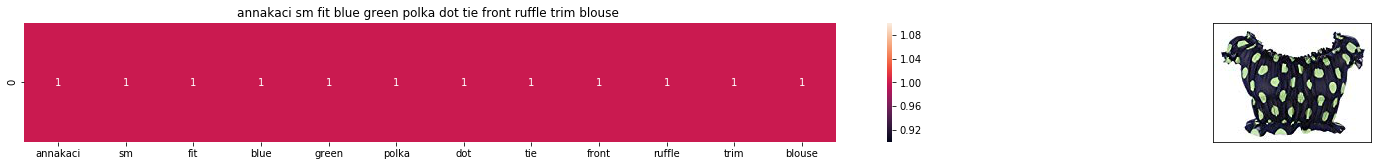

ASIN : B00KLHUIBS
Brand: Anna-Kaci
Title: annakaci sm fit blue green polka dot tie front ruffle trim blouse 
Euclidean similarity with the query image : 0.0


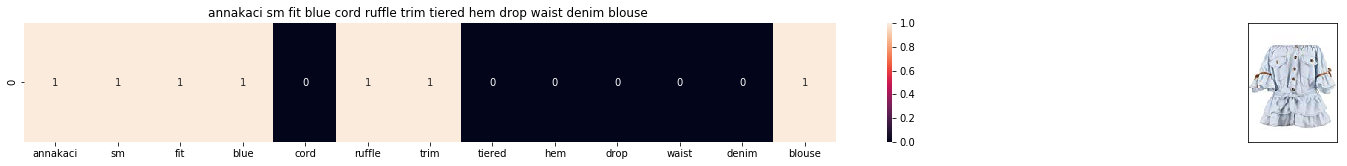

ASIN : B0759G15ZX
Brand: Anna-Kaci
Title: annakaci sm fit blue cord ruffle trim tiered hem drop waist denim blouse 
Euclidean similarity with the query image : 3.3166247903554


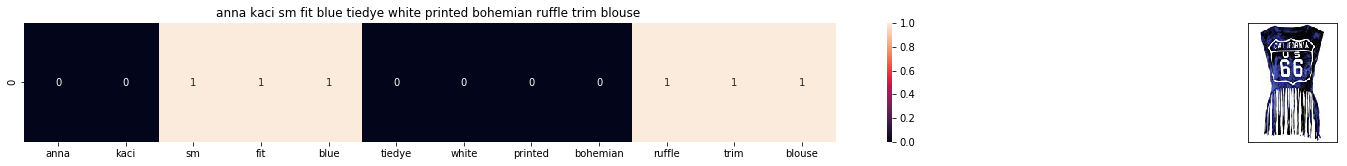

ASIN : B00YQ8S4K0
Brand: Anna-Kaci
Title: anna kaci sm fit blue tiedye white printed bohemian ruffle trim blouse 
Euclidean similarity with the query image : 3.4641016151377544


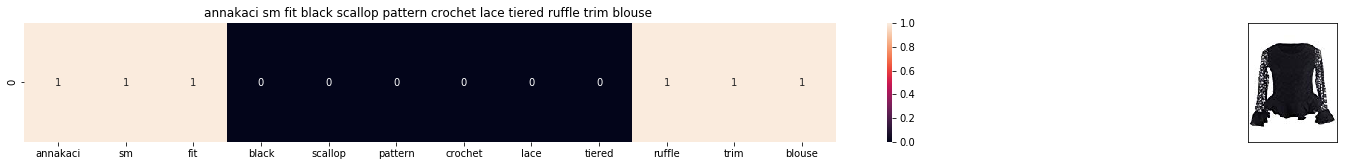

ASIN : B00O194W8W
Brand: Anna-Kaci
Title: annakaci sm fit black scallop pattern crochet lace tiered ruffle trim blouse 
Euclidean similarity with the query image : 3.4641016151377544


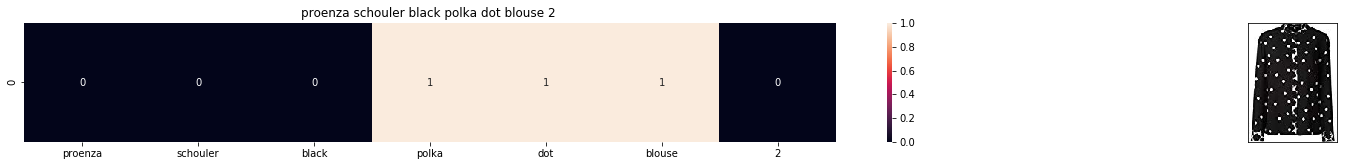

ASIN : B074TLHLMN
Brand: Proenza Schouler
Title: proenza schouler black polka dot blouse 2 
Euclidean similarity with the query image : 3.4641016151377544


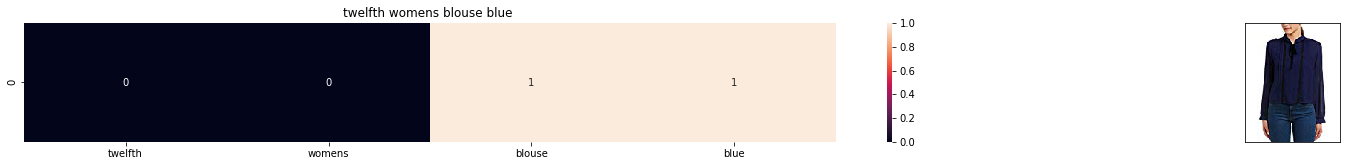

ASIN : B074F5BP5F
Brand: On Twelfth
Title: twelfth womens blouse blue 
Euclidean similarity with the query image : 3.4641016151377544


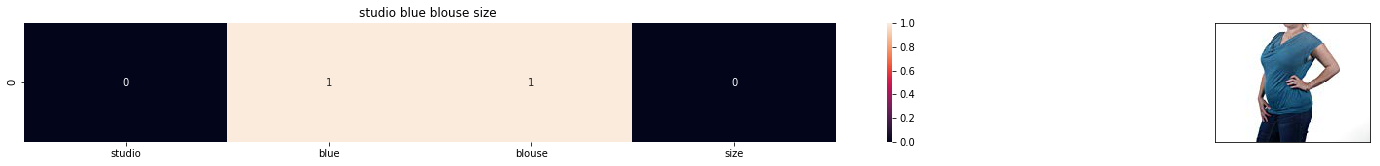

ASIN : B016P80OKQ
Brand: Studio M
Title: studio blue blouse size 
Euclidean similarity with the query image : 3.4641016151377544


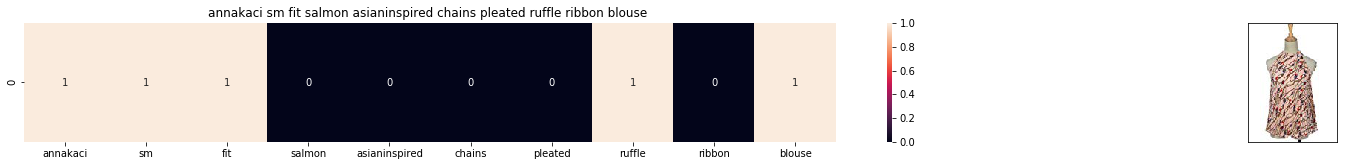

ASIN : B007KSG42S
Brand: Anna-Kaci
Title: annakaci sm fit salmon asianinspired chains pleated ruffle ribbon blouse 
Euclidean similarity with the query image : 3.4641016151377544


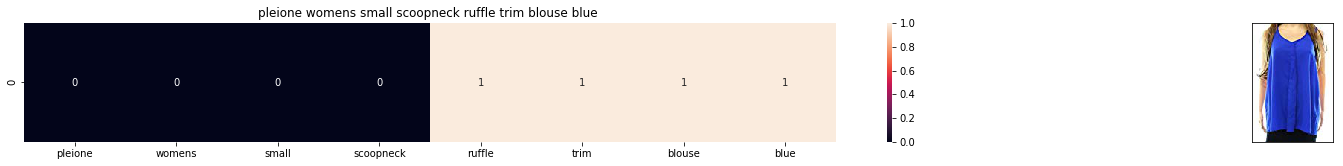

ASIN : B072VHTT1D
Brand: Pleione
Title: pleione womens small scoopneck ruffle trim blouse blue 
Euclidean similarity with the query image : 3.4641016151377544


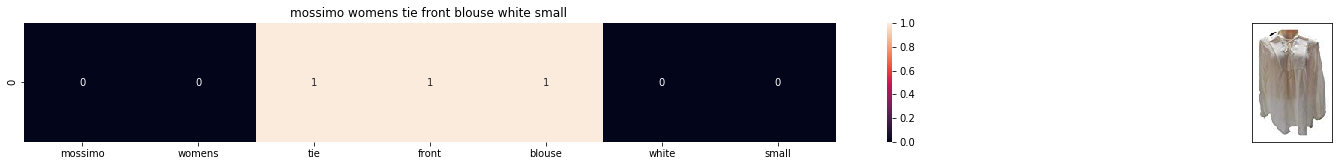

ASIN : B07111HHX6
Brand: Mossimo
Title: mossimo womens tie front blouse white small 
Euclidean similarity with the query image : 3.605551275463989


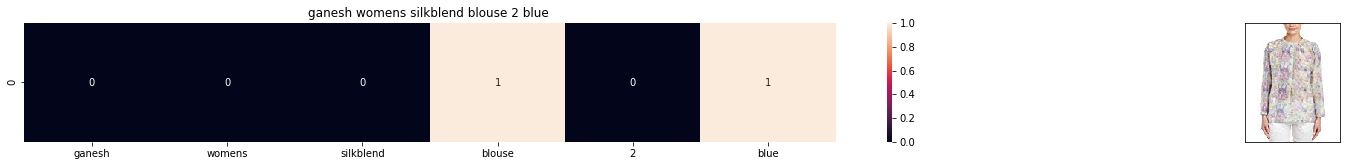

ASIN : B01N3SAT1F
Brand: Ganesh
Title: ganesh womens silkblend blouse 2 blue 
Euclidean similarity with the query image : 3.605551275463989


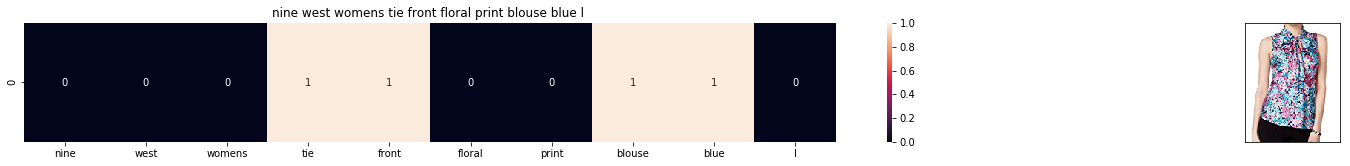

ASIN : B06WW5C6NJ
Brand: Nine West
Title: nine west womens tie front floral print blouse blue l 
Euclidean similarity with the query image : 3.605551275463989


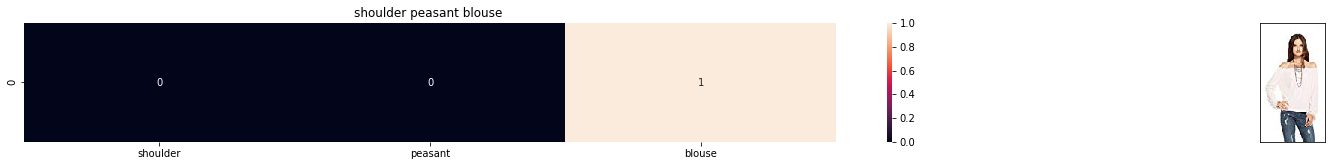

ASIN : B01E1QD5PK
Brand: CHASER
Title: shoulder peasant blouse 
Euclidean similarity with the query image : 3.605551275463989


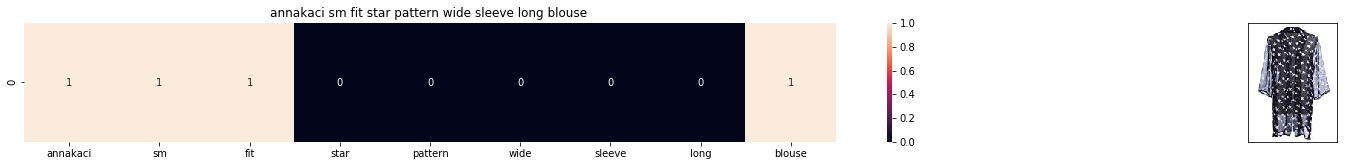

ASIN : B00G5RYY18
Brand: Anna-Kaci
Title: annakaci sm fit star pattern wide sleeve long blouse 
Euclidean similarity with the query image : 3.605551275463989


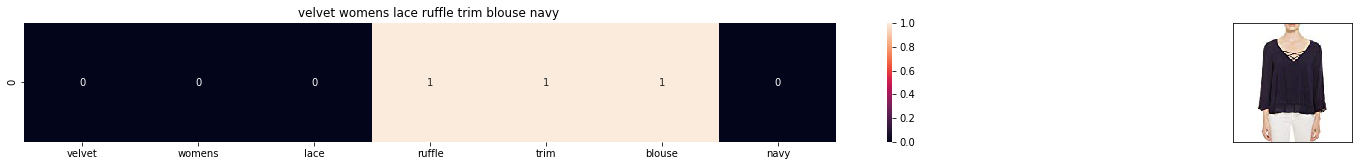

ASIN : B06XCZGQLP
Brand: Velvet by Graham & Spencer
Title: velvet womens lace ruffle trim blouse navy 
Euclidean similarity with the query image : 3.605551275463989


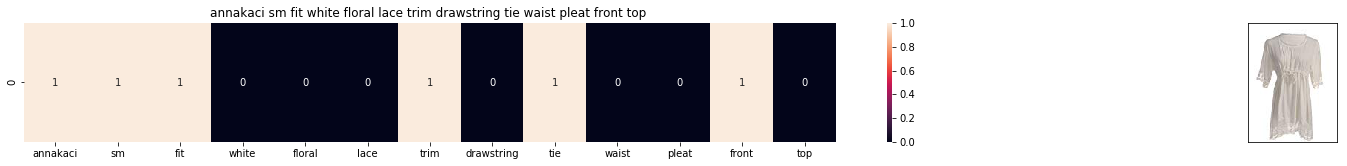

ASIN : B00DW1NKSS
Brand: Anna-Kaci
Title: annakaci sm fit white floral lace trim drawstring tie waist pleat front top 
Euclidean similarity with the query image : 3.605551275463989


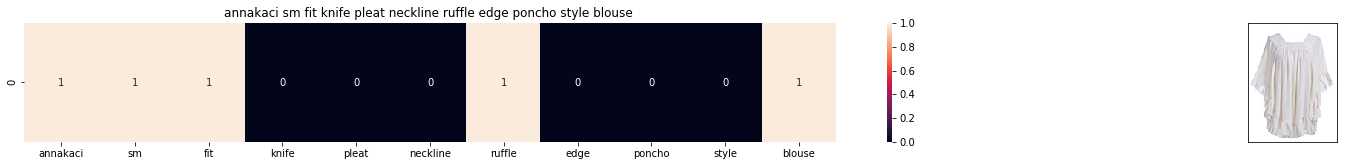

ASIN : B00HCNNOJW
Brand: Anna-Kaci
Title: annakaci sm fit knife pleat neckline ruffle edge poncho style blouse 
Euclidean similarity with the query image : 3.605551275463989


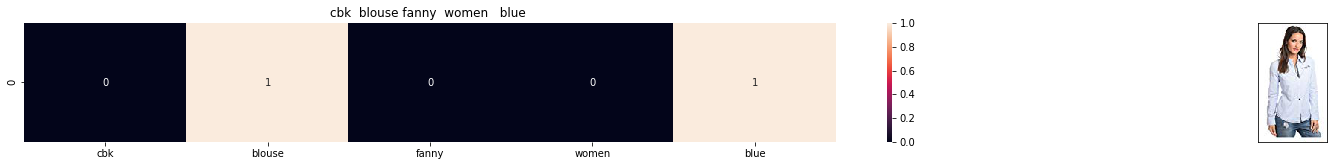

ASIN : B071NDX99J
Brand: CBK
Title: cbk  blouse fanny  women   blue 
Euclidean similarity with the query image : 3.605551275463989


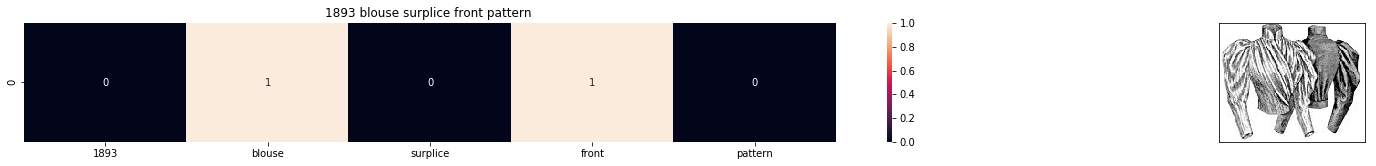

ASIN : B00886YXL0
Brand: Ageless Patterns
Title: 1893 blouse surplice front pattern 
Euclidean similarity with the query image : 3.605551275463989


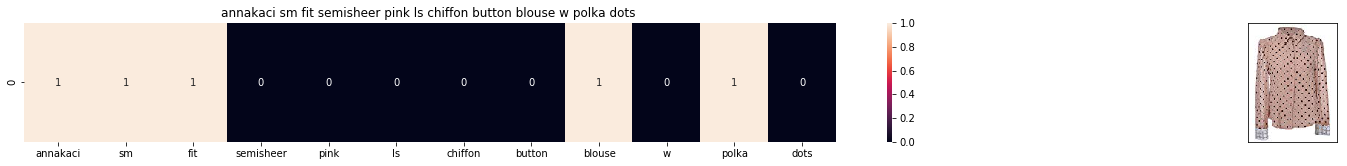

ASIN : B008Z5ST3C
Brand: Anna-Kaci
Title: annakaci sm fit semisheer pink ls chiffon button blouse w polka dots 
Euclidean similarity with the query image : 3.605551275463989


In [44]:
def bag_of_words_model(doc_id, num_results):
    # doc_id: apparel's id in given corpus
    
    # pairwise_dist will store the distance from given input apparel to all remaining apparels
    # the metric we used here is cosine, the coside distance is mesured as K(X, Y) = <X, Y> / (||X||*||Y||)
    # http://scikit-learn.org/stable/modules/metrics.html#cosine-similarity
    pairwise_dist = pairwise_distances(title_features,title_features[doc_id])
    
    # np.argsort will return indices of the smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])
    
    for i in range(0,len(indices)):
        # we will pass 1. doc_id, 2. title1, 3. title2, url, model
        get_result(indices[i],data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'bag_of_words')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print ('Brand:', data['brand'].loc[df_indices[i]])
        print ('Title:', data['title'].loc[df_indices[i]])
        print ('Euclidean similarity with the query image :', pdists[i])
        print('='*60)

#call the bag-of-words model for a product to get similar products.
bag_of_words_model(931, 20) # change the index if you want to.
# In the output heat map each value represents the count value 
# of the label word, the color represents the intersection 
# with inputs title.

#try 12566
#try 931

## [8.5] TF-IDF based product similarity

In [45]:
tfidf_title_vectorizer = TfidfVectorizer(min_df = 0)
tfidf_title_features = tfidf_title_vectorizer.fit_transform(data['title'])
# tfidf_title_features.shape = #data_points * #words_in_corpus
# CountVectorizer().fit_transform(courpus) returns the a sparase matrix of dimensions #data_points * #words_in_corpus
# tfidf_title_features[doc_id, index_of_word_in_corpus] = tfidf values of the word in given doc

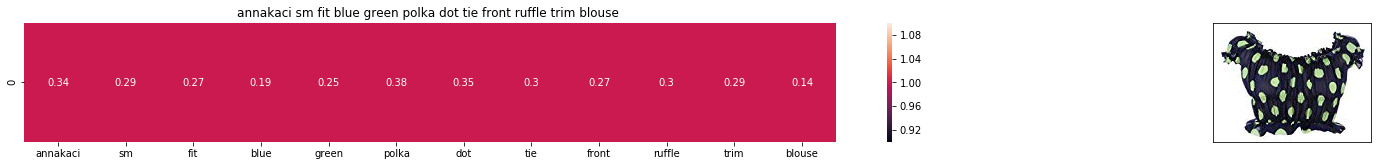

ASIN : B00KLHUIBS
BRAND : Anna-Kaci
Eucliden distance from the given image : 0.0


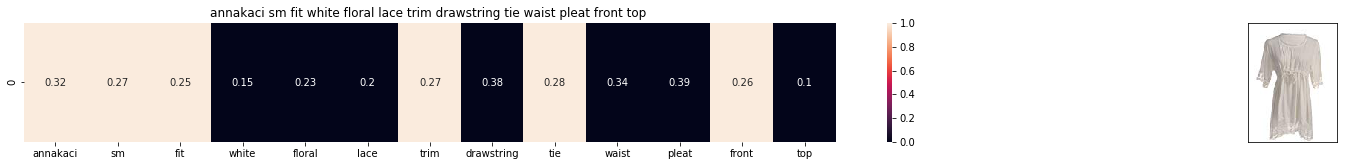

ASIN : B00DW1NKSS
BRAND : Anna-Kaci
Eucliden distance from the given image : 1.0095030470167985


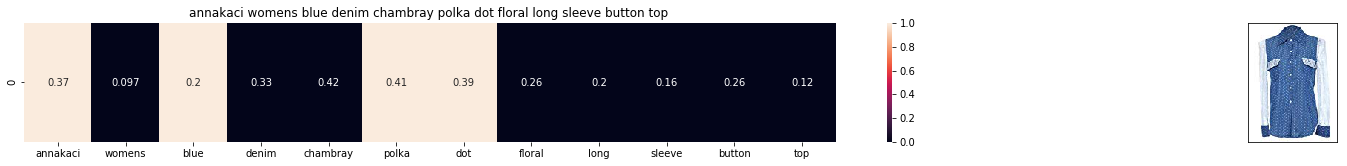

ASIN : B008SMIFN6
BRAND : Anna-Kaci
Eucliden distance from the given image : 1.0417985120306876


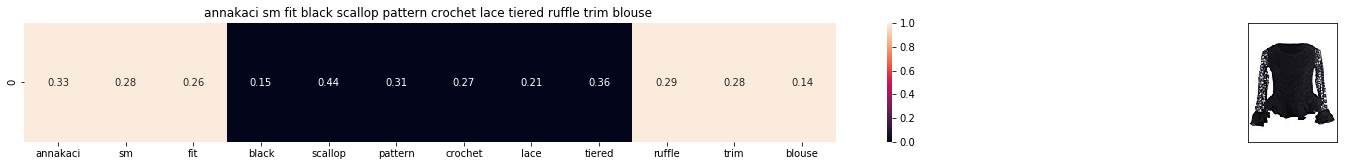

ASIN : B00O194W8W
BRAND : Anna-Kaci
Eucliden distance from the given image : 1.0459904789057266


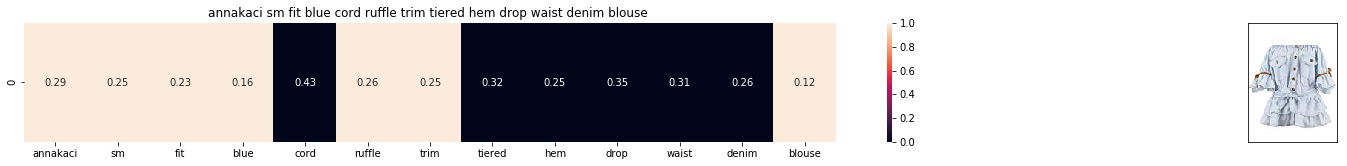

ASIN : B0759G15ZX
BRAND : Anna-Kaci
Eucliden distance from the given image : 1.0670382891349643


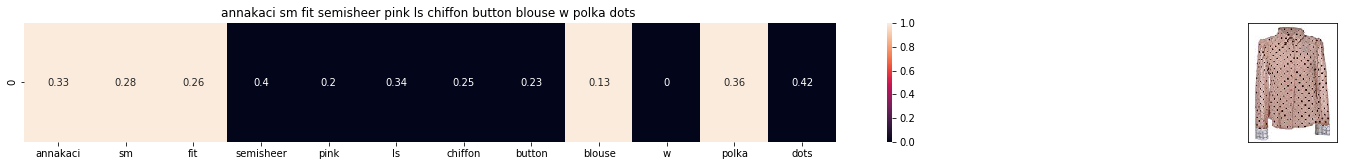

ASIN : B008Z5ST3C
BRAND : Anna-Kaci
Eucliden distance from the given image : 1.079194342831273


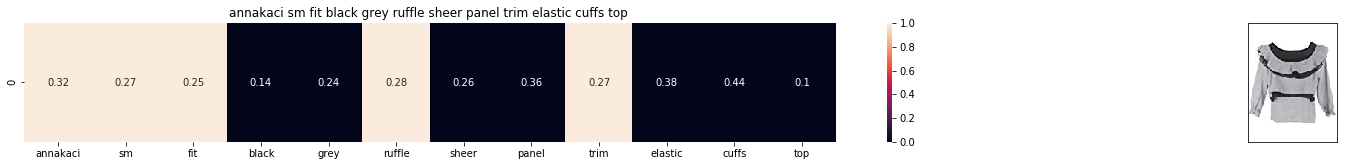

ASIN : B00OIBU11K
BRAND : Anna-Kaci
Eucliden distance from the given image : 1.0810642547494658


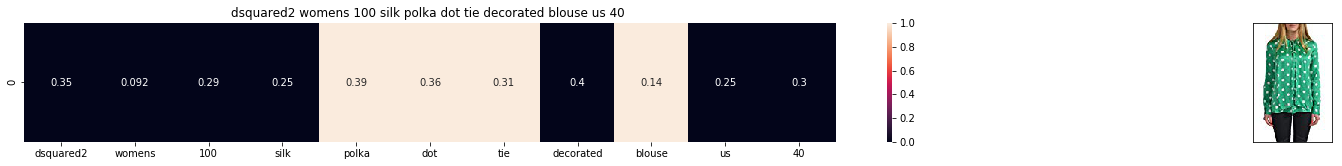

ASIN : B01AYBH28M
BRAND : DSQUARED2
Eucliden distance from the given image : 1.1040520792000035


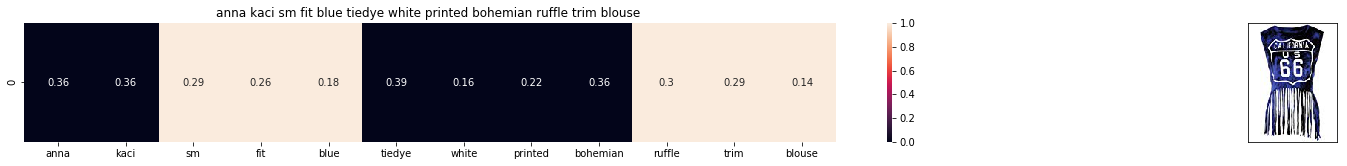

ASIN : B00YQ8S4K0
BRAND : Anna-Kaci
Eucliden distance from the given image : 1.1106318669558235


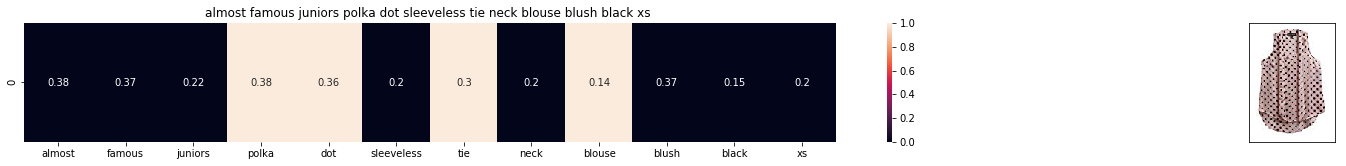

ASIN : B0745J9HNS
BRAND : Almost Famous
Eucliden distance from the given image : 1.1114784382103975


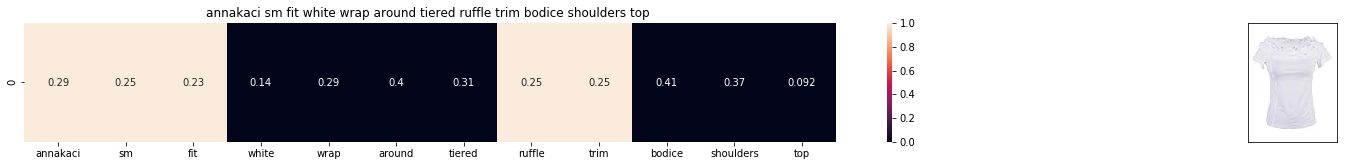

ASIN : B00LMKGFS8
BRAND : Anna-Kaci
Eucliden distance from the given image : 1.113963394862801


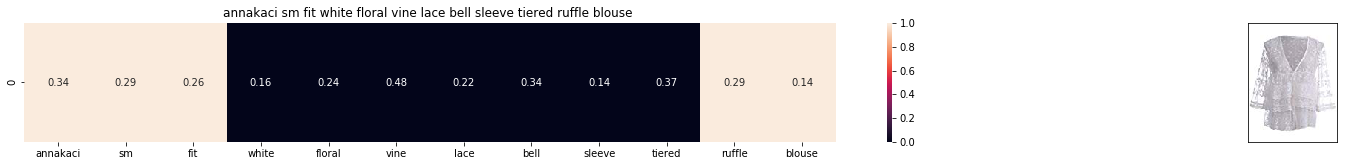

ASIN : B00DVOAWM8
BRAND : Anna-Kaci
Eucliden distance from the given image : 1.115670616192694


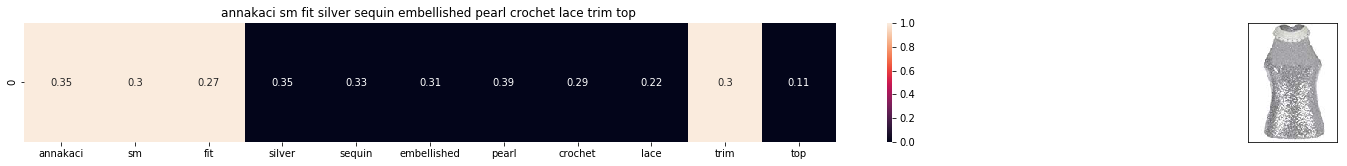

ASIN : B00OPFYBXI
BRAND : Anna-Kaci
Eucliden distance from the given image : 1.1246975675554731


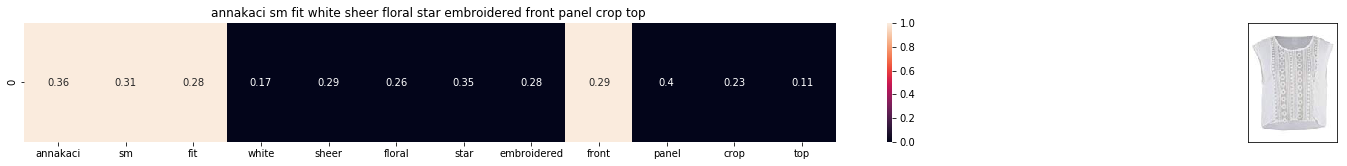

ASIN : B00NAB1R8A
BRAND : Anna-Kaci
Eucliden distance from the given image : 1.124773884923174


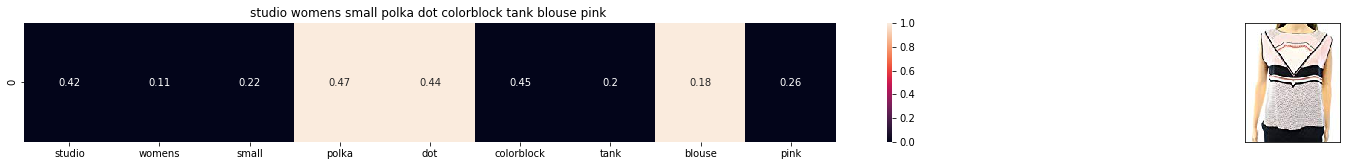

ASIN : B0721KC2HT
BRAND : Studio M
Eucliden distance from the given image : 1.129816389682597


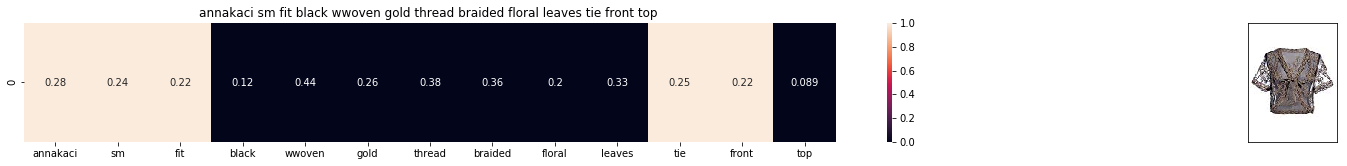

ASIN : B00E7Z8DWQ
BRAND : Anna-Kaci
Eucliden distance from the given image : 1.13146940297404


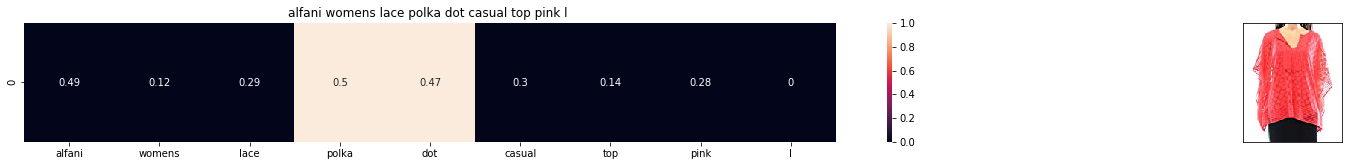

ASIN : B07125NJJ2
BRAND : Alfani
Eucliden distance from the given image : 1.1325545037426967


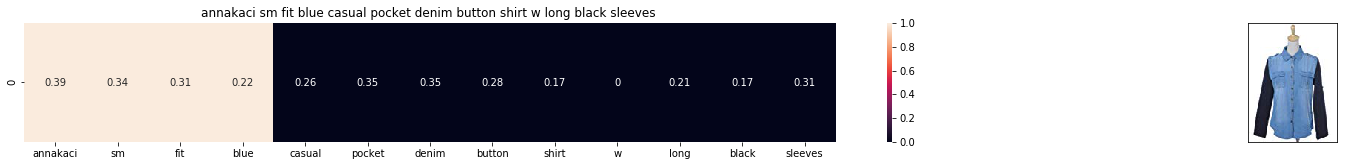

ASIN : B0097LQOOY
BRAND : Anna-Kaci
Eucliden distance from the given image : 1.134493010198643


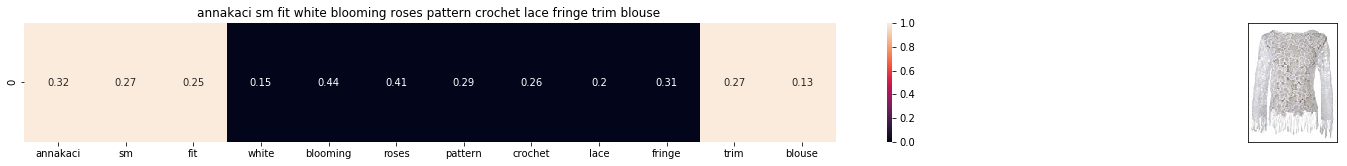

ASIN : B00RDLAR2A
BRAND : Anna-Kaci
Eucliden distance from the given image : 1.1394888920467072


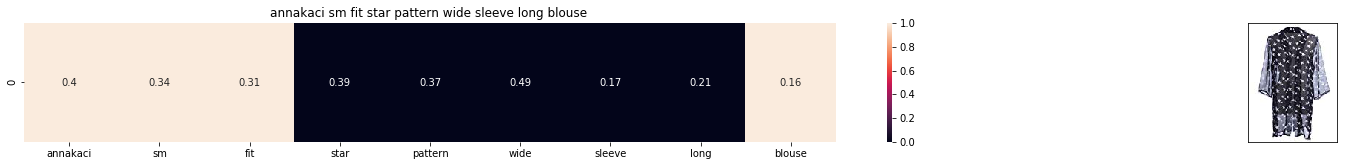

ASIN : B00G5RYY18
BRAND : Anna-Kaci
Eucliden distance from the given image : 1.1474660726278398


In [47]:
def tfidf_model(doc_id, num_results):
    # doc_id: apparel's id in given corpus
    
    # pairwise_dist will store the distance from given input apparel to all remaining apparels
    # the metric we used here is cosine, the coside distance is mesured as K(X, Y) = <X, Y> / (||X||*||Y||)
    # http://scikit-learn.org/stable/modules/metrics.html#cosine-similarity
    pairwise_dist = pairwise_distances(tfidf_title_features,tfidf_title_features[doc_id])

    # np.argsort will return indices of 9 smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the 9 smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])

    for i in range(0,len(indices)):
        # we will pass 1. doc_id, 2. title1, 3. title2, url, model
        get_result(indices[i], data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'tfidf')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('BRAND :',data['brand'].loc[df_indices[i]])
        print ('Eucliden distance from the given image :', pdists[i])
        print('='*125)
tfidf_model(931, 20)
# in the output heat map each value represents the tfidf values of the label word, the color represents the intersection with inputs title

## [8.5] IDF based product similarity

In [48]:
idf_title_vectorizer = CountVectorizer()
idf_title_features = idf_title_vectorizer.fit_transform(data['title'])

# idf_title_features.shape = #data_points * #words_in_corpus
# CountVectorizer().fit_transform(courpus) returns the a sparase matrix of dimensions #data_points * #words_in_corpus
# idf_title_features[doc_id, index_of_word_in_corpus] = number of times the word occured in that doc

In [49]:
def n_containing(word):
    # return the number of documents which had the given word
    return sum(1 for blob in data['title'] if word in blob.split())

def idf(word):
    # idf = log(#number of docs / #number of docs which had the given word)
    return math.log(data.shape[0] / (n_containing(word)))

In [50]:
# we need to convert the values into float
idf_title_features  = idf_title_features.astype(np.float)

for i in idf_title_vectorizer.vocabulary_.keys():
    # for every word in whole corpus we will find its idf value
    idf_val = idf(i)
    
    # to calculate idf_title_features we need to replace the count values with the idf values of the word
    # idf_title_features[:, idf_title_vectorizer.vocabulary_[i]].nonzero()[0] will return all documents in which the word i present
    for j in idf_title_features[:, idf_title_vectorizer.vocabulary_[i]].nonzero()[0]:
        
        # we replace the count values of word i in document j with  idf_value of word i 
        # idf_title_features[doc_id, index_of_word_in_courpus] = idf value of word
        idf_title_features[j,idf_title_vectorizer.vocabulary_[i]] = idf_val
        

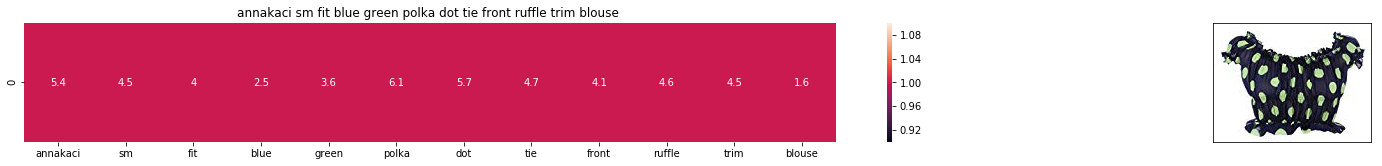

ASIN : B00KLHUIBS
Brand : Anna-Kaci
euclidean distance from the given image : 0.0


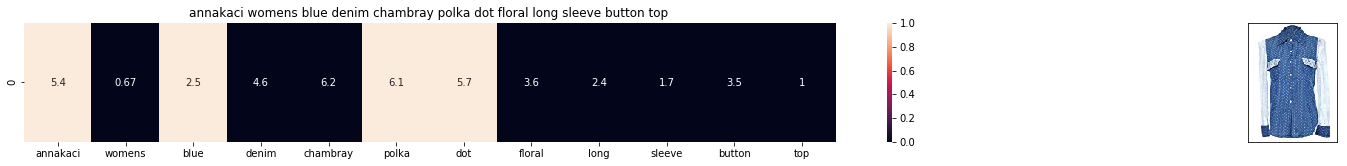

ASIN : B008SMIFN6
Brand : Anna-Kaci
euclidean distance from the given image : 15.046151721911697


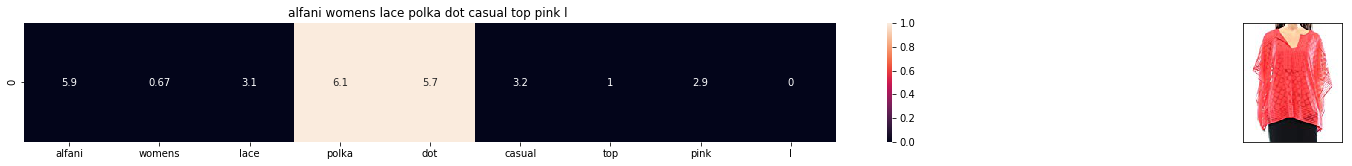

ASIN : B07125NJJ2
Brand : Alfani
euclidean distance from the given image : 15.222769212649535


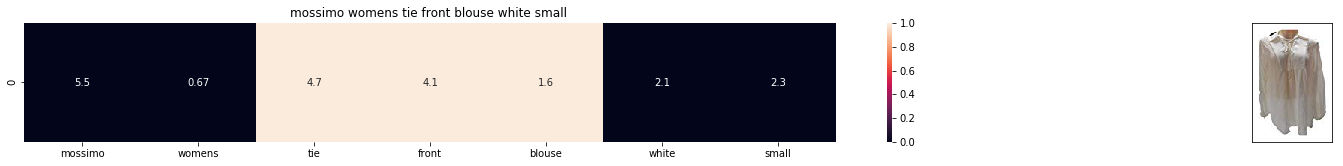

ASIN : B07111HHX6
Brand : Mossimo
euclidean distance from the given image : 15.3415518161122


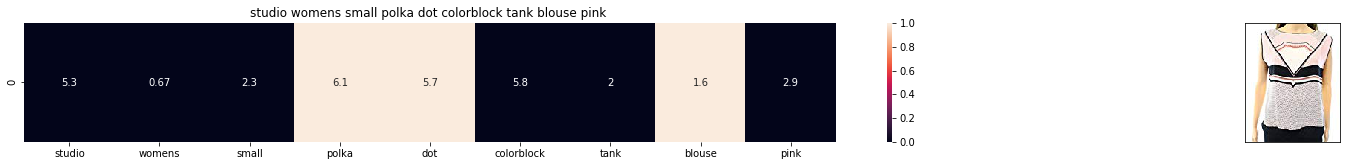

ASIN : B0721KC2HT
Brand : Studio M
euclidean distance from the given image : 15.627349276848992


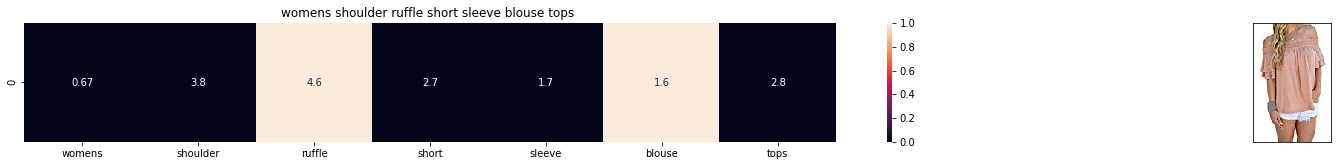

ASIN : B01KXEE20Q
Brand : ouwoow
euclidean distance from the given image : 15.685249209812426


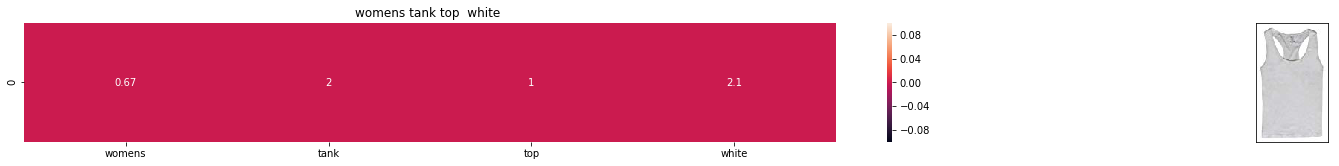

ASIN : B00JPOZ9GM
Brand : Sofra
euclidean distance from the given image : 15.698624105009333


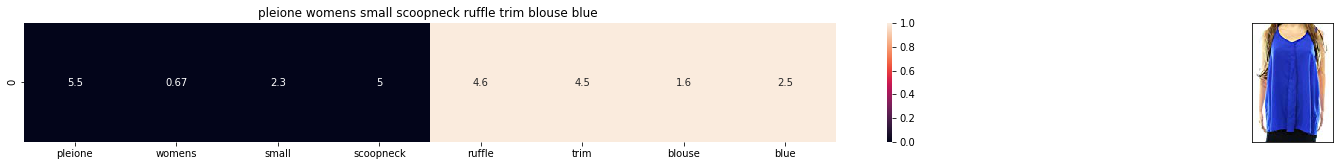

ASIN : B072VHTT1D
Brand : Pleione
euclidean distance from the given image : 15.733159164541727


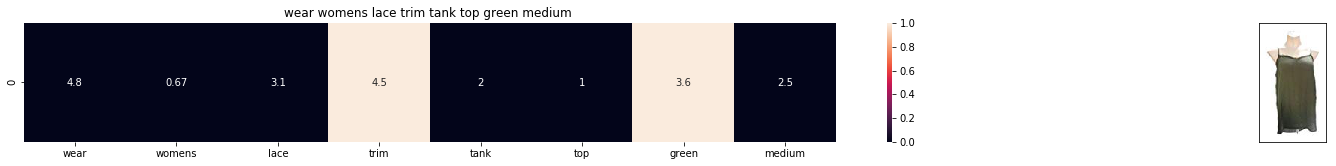

ASIN : B0722TS9DK
Brand : Who What Wear
euclidean distance from the given image : 15.746519642051068


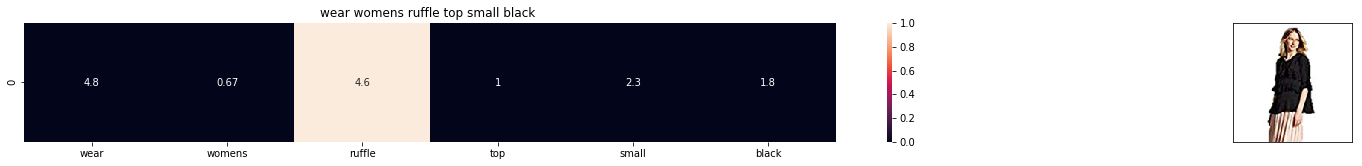

ASIN : B07258X2FK
Brand : Who What Wear
euclidean distance from the given image : 15.76861658770721


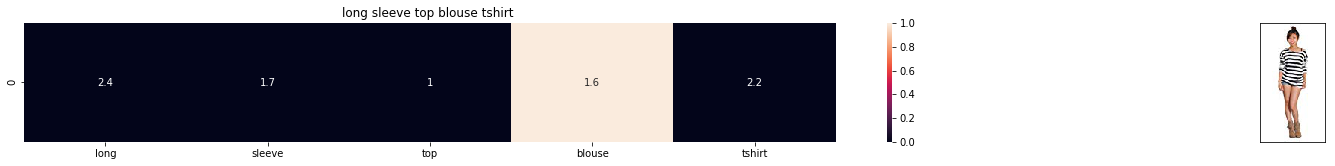

ASIN : B00KF2N5PU
Brand : Vietsbay
euclidean distance from the given image : 15.769570727563098


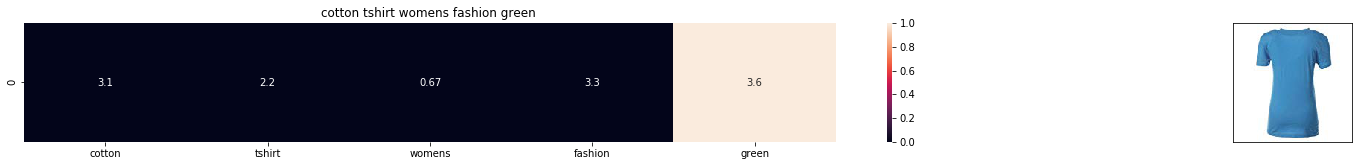

ASIN : B073GJGVBN
Brand : Ivan Levi
euclidean distance from the given image : 15.811562821616887


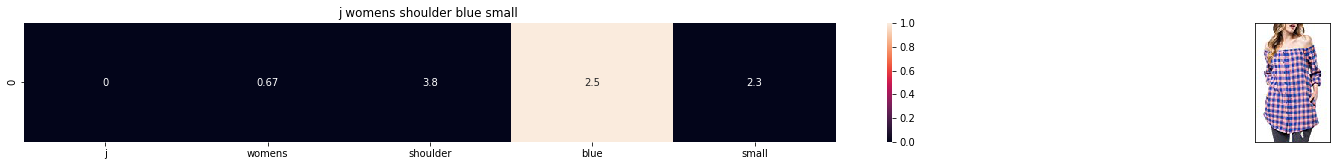

ASIN : B07583CQFT
Brand : Very J
euclidean distance from the given image : 15.83828054738109


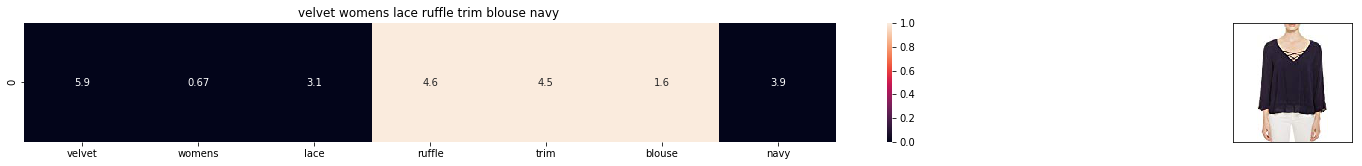

ASIN : B06XCZGQLP
Brand : Velvet by Graham & Spencer
euclidean distance from the given image : 15.878781785172018


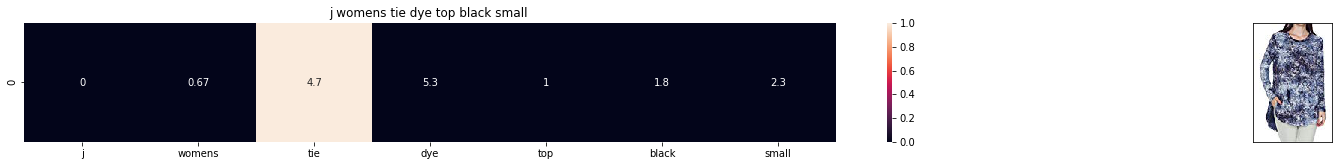

ASIN : B075831F14
Brand : Very J
euclidean distance from the given image : 15.928749759426031


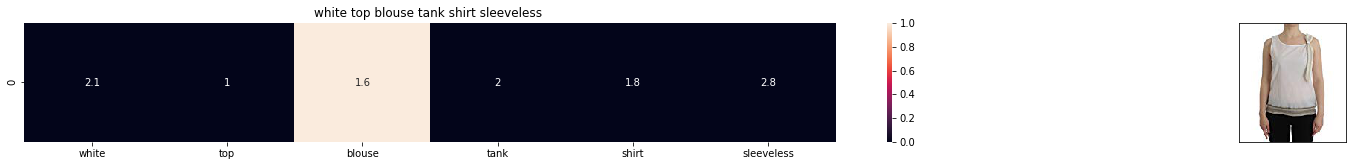

ASIN : B074G5G5RK
Brand : ERMANNO SCERVINO
euclidean distance from the given image : 15.953279501032116


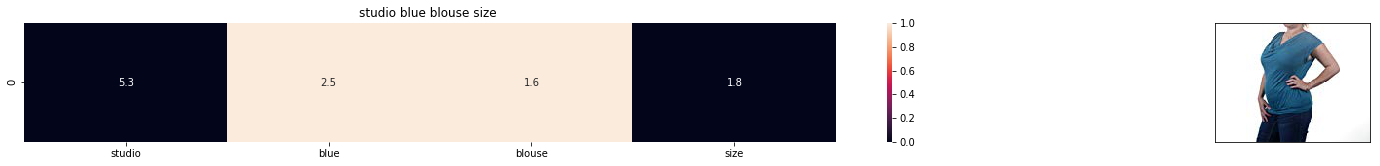

ASIN : B016P80OKQ
Brand : Studio M
euclidean distance from the given image : 16.078823245515473


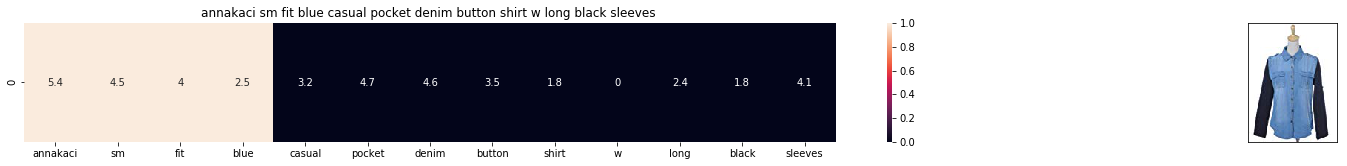

ASIN : B0097LQOOY
Brand : Anna-Kaci
euclidean distance from the given image : 16.11978163937991


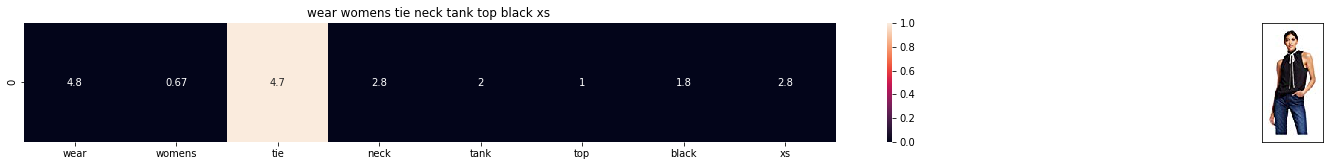

ASIN : B071RYB16J
Brand : Who What Wear
euclidean distance from the given image : 16.18992757930191


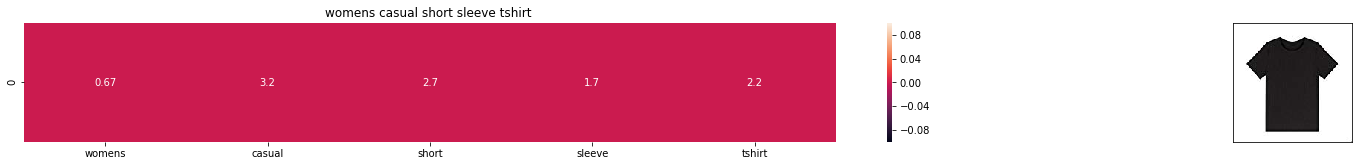

ASIN : B074T9KG9Q
Brand : Rain
euclidean distance from the given image : 16.20255923081081


In [51]:
def idf_model(doc_id, num_results):
    # doc_id: apparel's id in given corpus
    
    # pairwise_dist will store the distance from given input apparel to all remaining apparels
    # the metric we used here is cosine, the coside distance is mesured as K(X, Y) = <X, Y> / (||X||*||Y||)
    # http://scikit-learn.org/stable/modules/metrics.html#cosine-similarity
    pairwise_dist = pairwise_distances(idf_title_features,idf_title_features[doc_id])

    # np.argsort will return indices of 9 smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the 9 smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])

    for i in range(0,len(indices)):
        get_result(indices[i],data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'idf')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('Brand :',data['brand'].loc[df_indices[i]])
        print ('euclidean distance from the given image :', pdists[i])
        print('='*125)

        
        
idf_model(931,20)
# in the output heat map each value represents the idf values of the label word, the color represents the intersection with inputs title

# [9] Text Semantics based product similarity

In [56]:
# !pip3 install -U gensim

In [8]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

# in this project we are using a pretrained model by google
# its 3.3G file, once you load this into your memory 
# it occupies ~9Gb, so please do this step only if you have >12G of ram
# we will provide a pickle file wich contains a dict , 
# and it contains all our courpus words as keys and  model[word] as values
# To use this code-snippet, download "GoogleNews-vectors-negative300.bin" 
# from https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit
# it's 1.9GB in size.

'''
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
'''

#if you do NOT have RAM >= 12GB, use the code below.
with open('word2vec_model', 'rb') as handle:
    model = pickle.load(handle)


In [6]:
# Utility functions

def get_word_vec(sentence, doc_id, m_name):
    # sentence : title of the apparel
    # doc_id: document id in our corpus
    # m_name: model information it will take two values
        # if  m_name == 'avg', we will append the model[i], w2v representation of word i
        # if m_name == 'weighted', we will multiply each w2v[word] with the idf(word)
    vec = []
    for i in sentence.split():
        if i in vocab:
            if m_name == 'weighted' and i in  idf_title_vectorizer.vocabulary_:
                vec.append(idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[i]] * model[i])
            elif m_name == 'avg':
                vec.append(model[i])
        else:
            # if the word in our courpus is not there in the google word2vec corpus, we are just ignoring it
            vec.append(np.zeros(shape=(300,)))
    # we will return a numpy array of shape (#number of words in title * 300 ) 300 = len(w2v_model[word])
    # each row represents the word2vec representation of each word (weighted/avg) in given sentance 
    return  np.array(vec)

def get_distance(vec1, vec2):
    # vec1 = np.array(#number_of_words_title1 * 300), each row is a vector of length 300 corresponds to each word in give title
    # vec2 = np.array(#number_of_words_title2 * 300), each row is a vector of length 300 corresponds to each word in give title
    
    final_dist = []
    # for each vector in vec1 we caluclate the distance(euclidean) to all vectors in vec2
    for i in vec1:
        dist = []
        for j in vec2:
            # np.linalg.norm(i-j) will result the euclidean distance between vectors i, j
            dist.append(np.linalg.norm(i-j))
        final_dist.append(np.array(dist))
    # final_dist = np.array(#number of words in title1 * #number of words in title2)
    # final_dist[i,j] = euclidean distance between vectors i, j
    return np.array(final_dist)


def heat_map_w2v(sentence1, sentence2, url, doc_id1, doc_id2, model):
    # sentance1 : title1, input apparel
    # sentance2 : title2, recommended apparel
    # url: apparel image url
    # doc_id1: document id of input apparel
    # doc_id2: document id of recommended apparel
    # model: it can have two values, 1. avg 2. weighted
    
    #s1_vec = np.array(#number_of_words_title1 * 300), each row is a vector(weighted/avg) of length 300 corresponds to each word in give title
    s1_vec = get_word_vec(sentence1, doc_id1, model)
    #s2_vec = np.array(#number_of_words_title1 * 300), each row is a vector(weighted/avg) of length 300 corresponds to each word in give title
    s2_vec = get_word_vec(sentence2, doc_id2, model)

    # s1_s2_dist = np.array(#number of words in title1 * #number of words in title2)
    # s1_s2_dist[i,j] = euclidean distance between words i, j
    s1_s2_dist = get_distance(s1_vec, s2_vec)

    
    
    # devide whole figure into 2 parts 1st part displays heatmap 2nd part displays image of apparel
    gs = gridspec.GridSpec(2, 2, width_ratios=[4,1],height_ratios=[2,1]) 
    fig = plt.figure(figsize=(15,15))
    
    ax = plt.subplot(gs[0])
    # ploting the heap map based on the pairwise distances
    ax = sns.heatmap(np.round(s1_s2_dist,4), annot=True)
    # set the x axis labels as recommended apparels title
    ax.set_xticklabels(sentence2.split())
    # set the y axis labels as input apparels title
    ax.set_yticklabels(sentence1.split())
    # set title as recommended apparels title
    ax.set_title(sentence2)
    
    ax = plt.subplot(gs[1])
    # we remove all grids and axis labels for image
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    display_img(url, ax, fig)
    
    plt.show()

In [9]:
# vocab = stores all the words that are there in google w2v model
# vocab = model.wv.vocab.keys() # if you are using Google word2Vec

vocab = model.keys()
# this function will add the vectors of each word and returns the avg vector of given sentance
def build_avg_vec(sentence, num_features, doc_id, m_name):
    # sentace: its title of the apparel
    # num_features: the lenght of word2vec vector, its values = 300
    # m_name: model information it will take two values
        # if  m_name == 'avg', we will append the model[i], w2v representation of word i
        # if m_name == 'weighted', we will multiply each w2v[word] with the idf(word)

    featureVec = np.zeros((num_features,), dtype="float32")
    # we will intialize a vector of size 300 with all zeros
    # we add each word2vec(wordi) to this fetureVec
    nwords = 0
    
    for word in sentence.split():
        nwords += 1
        if word in vocab:
            if m_name == 'weighted' and word in  idf_title_vectorizer.vocabulary_:
                featureVec = np.add(featureVec, idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[word]] * model[word])
            elif m_name == 'avg':
                featureVec = np.add(featureVec, model[word])
    if(nwords>0):
        featureVec = np.divide(featureVec, nwords)
    # returns the avg vector of given sentance, its of shape (1, 300)
    return featureVec

### [9.2] Average Word2Vec product similarity.

In [10]:
doc_id = 0
w2v_title = []
# for every title we build a avg vector representation
for i in data['title']:
    w2v_title.append(build_avg_vec(i, 300, doc_id,'avg'))
    doc_id += 1

# w2v_title = np.array(# number of doc in courpus * 300), each row corresponds to a doc 
w2v_title = np.array(w2v_title)


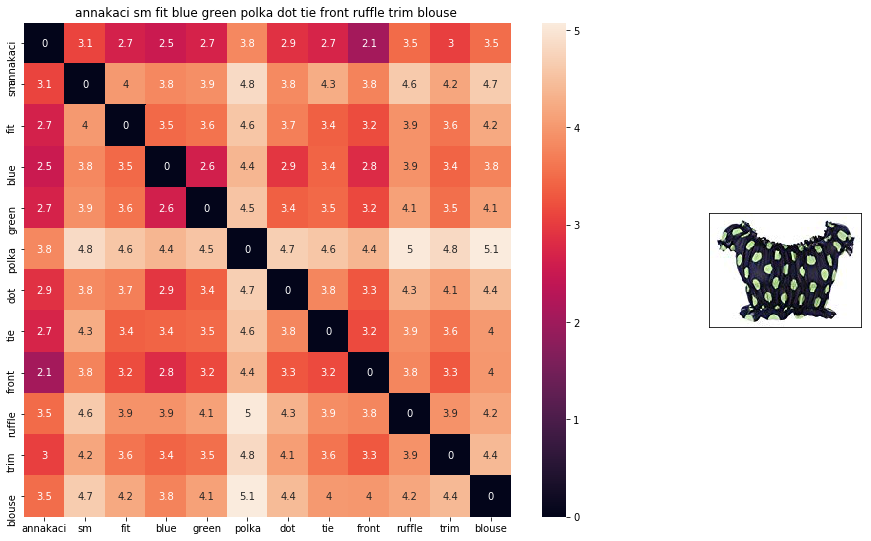

ASIN : B00KLHUIBS
BRAND : Anna-Kaci
euclidean distance from given input image : 0.0


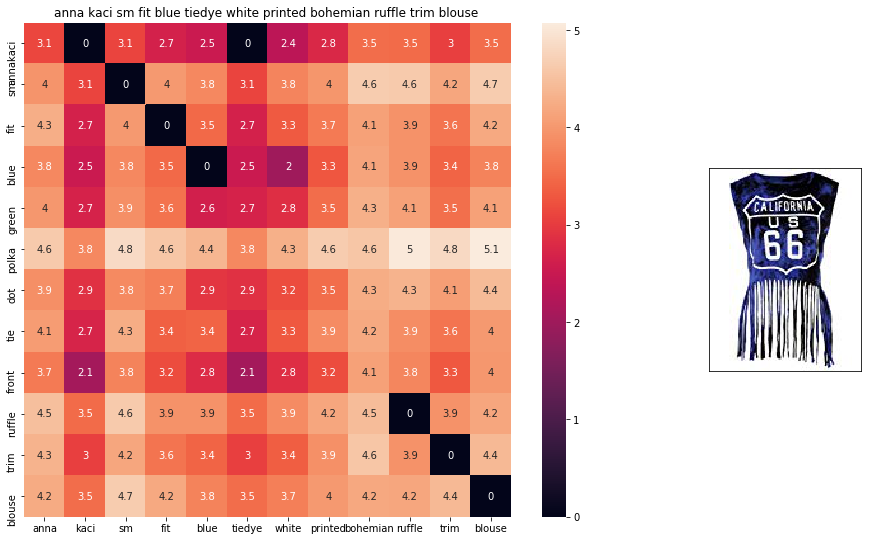

ASIN : B00YQ8S4K0
BRAND : Anna-Kaci
euclidean distance from given input image : 0.669069


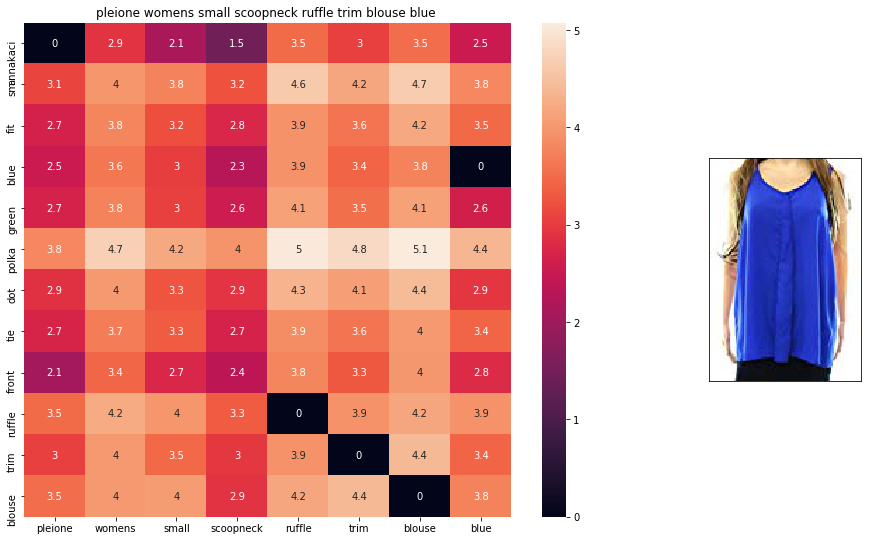

ASIN : B072VHTT1D
BRAND : Pleione
euclidean distance from given input image : 0.79176706


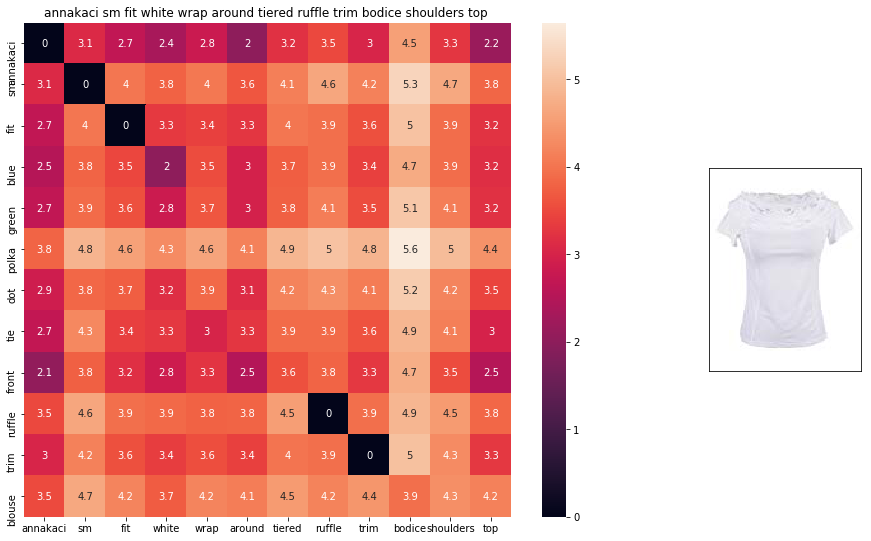

ASIN : B00LMKGFS8
BRAND : Anna-Kaci
euclidean distance from given input image : 0.80942315


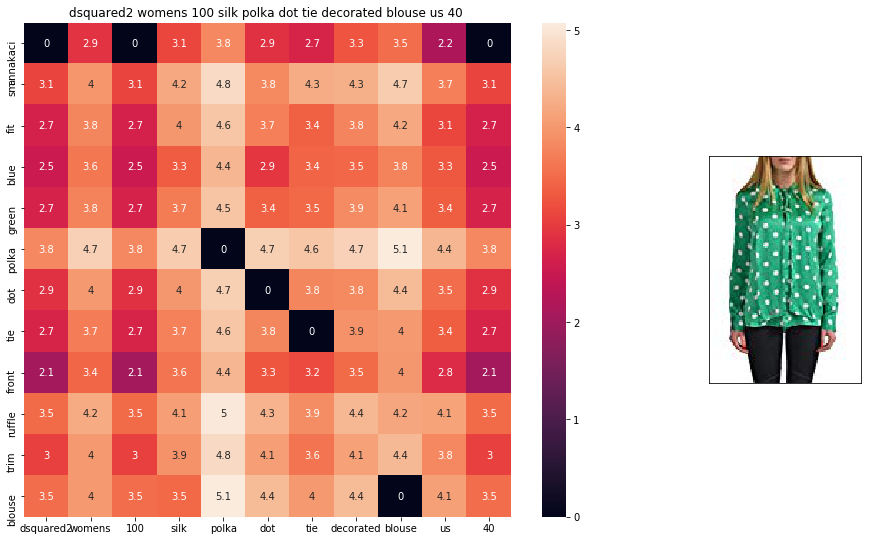

ASIN : B01AYBH28M
BRAND : DSQUARED2
euclidean distance from given input image : 0.8127421


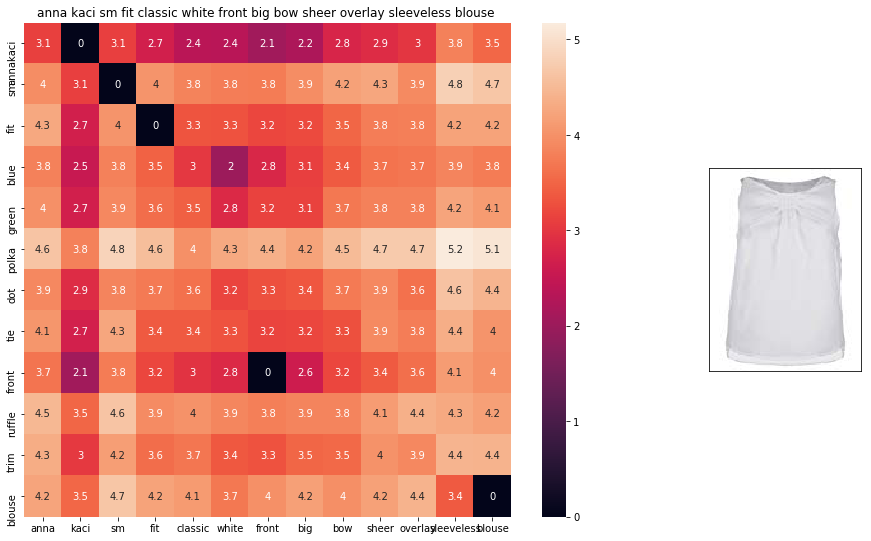

ASIN : B010EH3S02
BRAND : Anna-Kaci
euclidean distance from given input image : 0.8188168


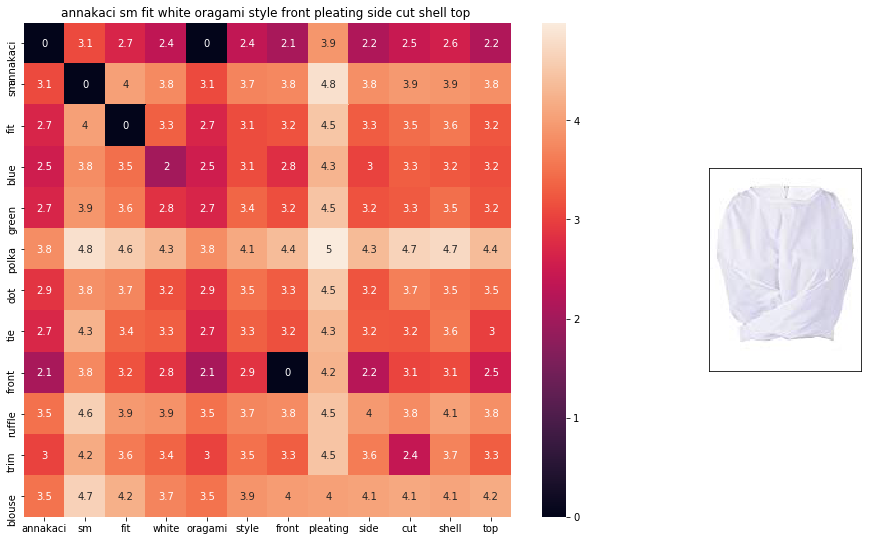

ASIN : B00LU4Z2YY
BRAND : Anna-Kaci
euclidean distance from given input image : 0.819001


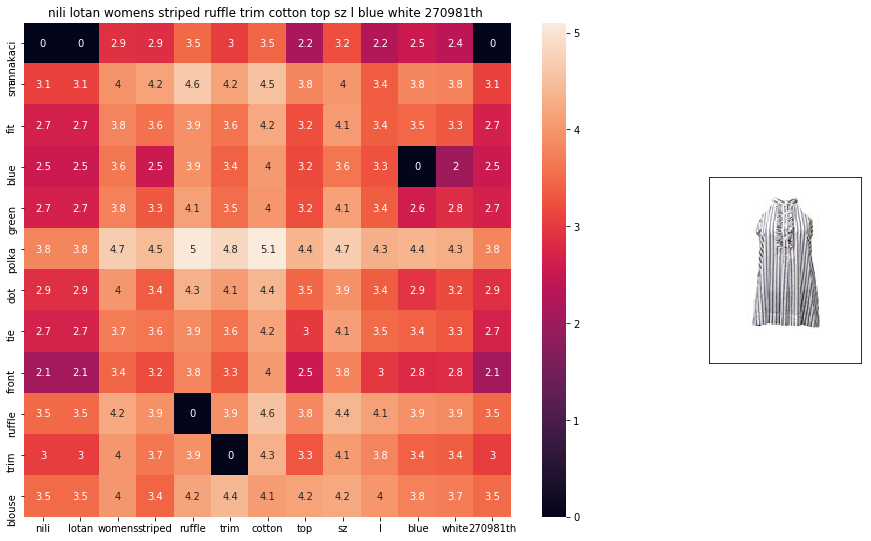

ASIN : B074PFR9CF
BRAND : Nili Lotan
euclidean distance from given input image : 0.821753


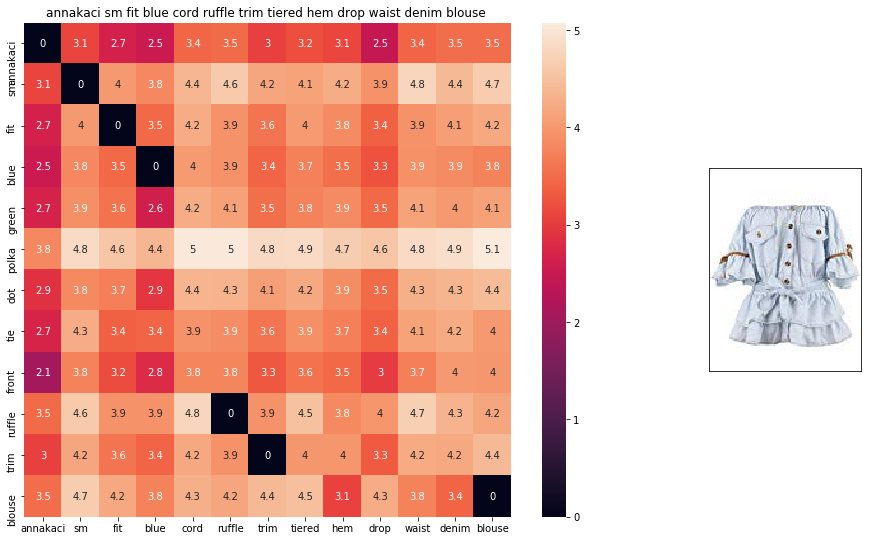

ASIN : B0759G15ZX
BRAND : Anna-Kaci
euclidean distance from given input image : 0.82678145


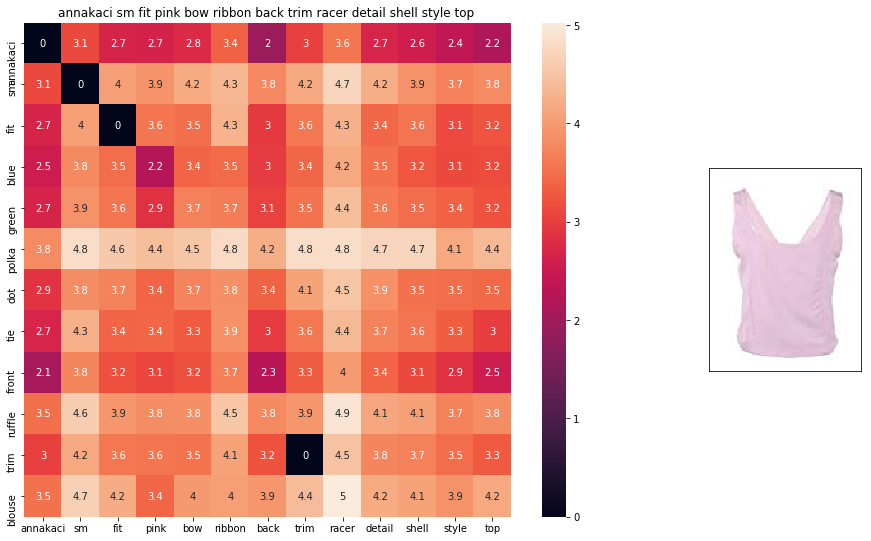

ASIN : B00KOBQEBO
BRAND : Anna-Kaci
euclidean distance from given input image : 0.8268439


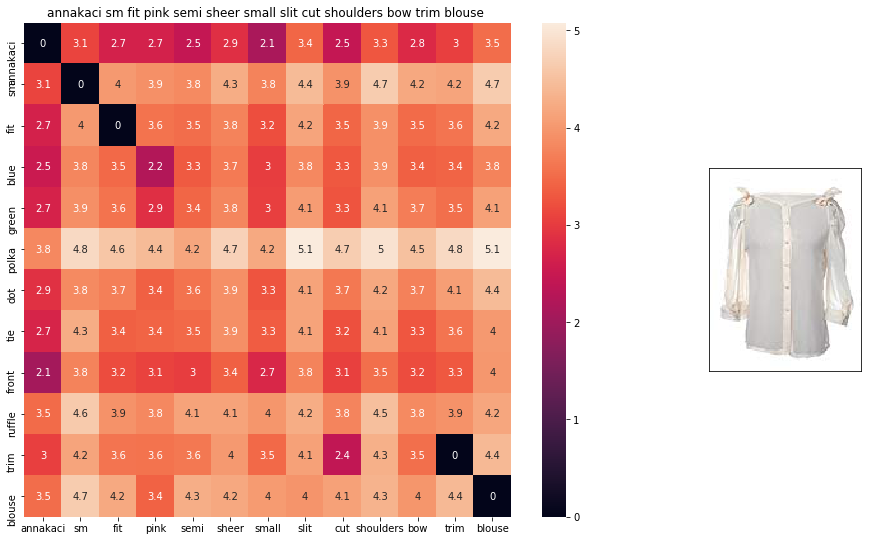

ASIN : B00HM9OD8W
BRAND : Anna-Kaci
euclidean distance from given input image : 0.82737064


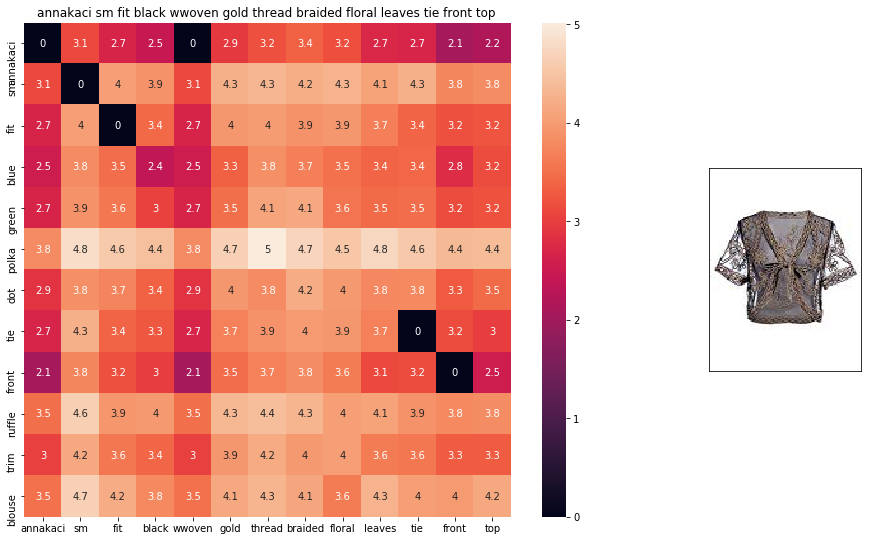

ASIN : B00E7Z8DWQ
BRAND : Anna-Kaci
euclidean distance from given input image : 0.8279004


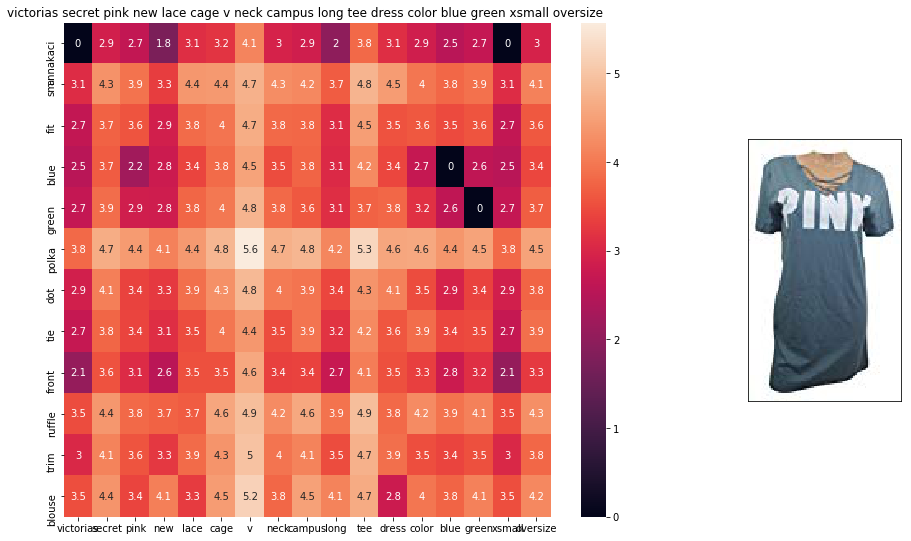

ASIN : B074JKJHNQ
BRAND : VS Pink
euclidean distance from given input image : 0.8330928


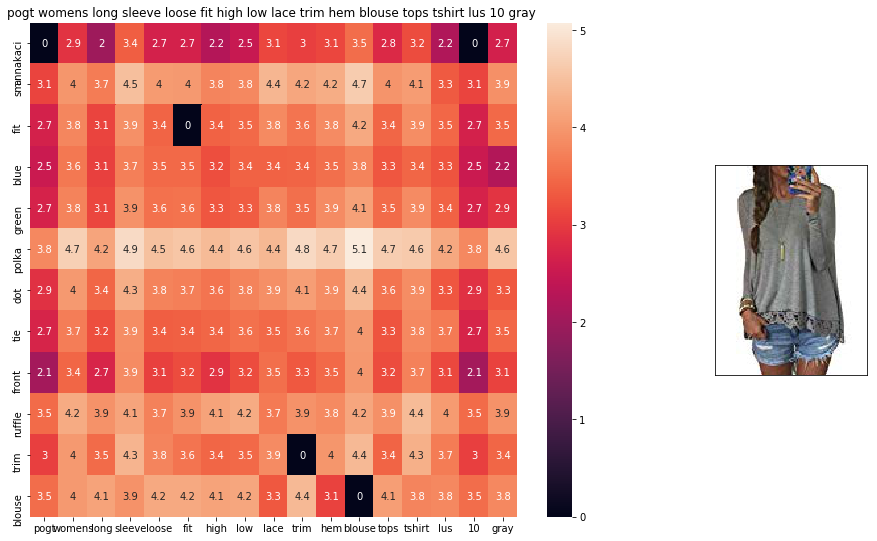

ASIN : B01M19NC0Y
BRAND : POGT
euclidean distance from given input image : 0.83579636


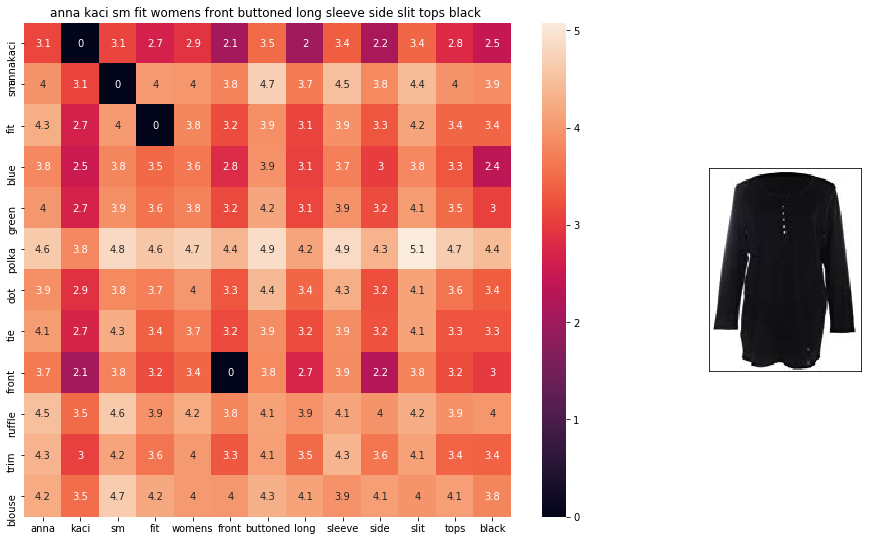

ASIN : B019820A4Q
BRAND : Anna-Kaci
euclidean distance from given input image : 0.8429624


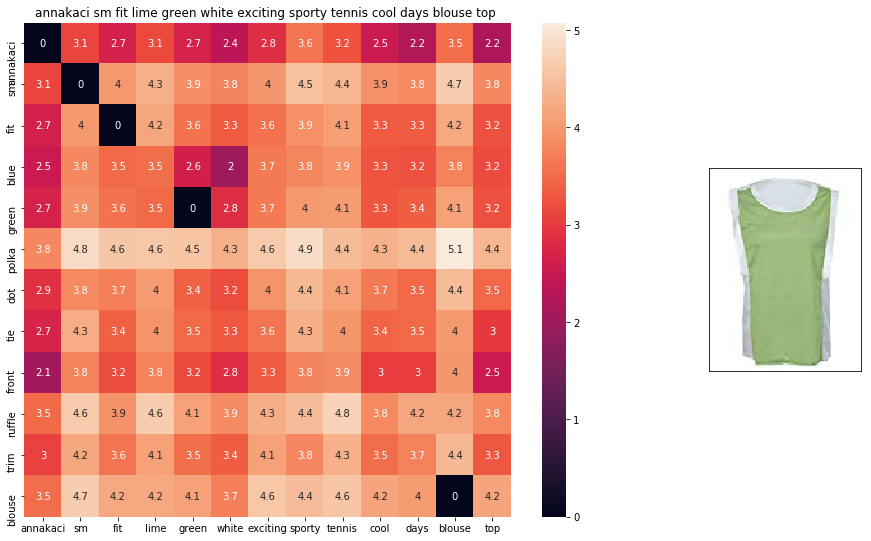

ASIN : B007Y9SZSY
BRAND : Anna-Kaci
euclidean distance from given input image : 0.84324473


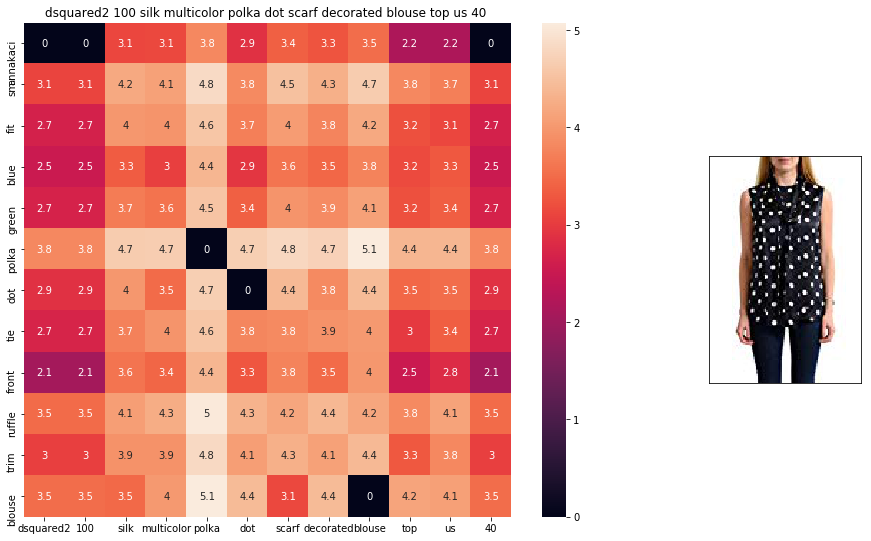

ASIN : B01D6FVFH2
BRAND : DSQUARED2
euclidean distance from given input image : 0.8452494


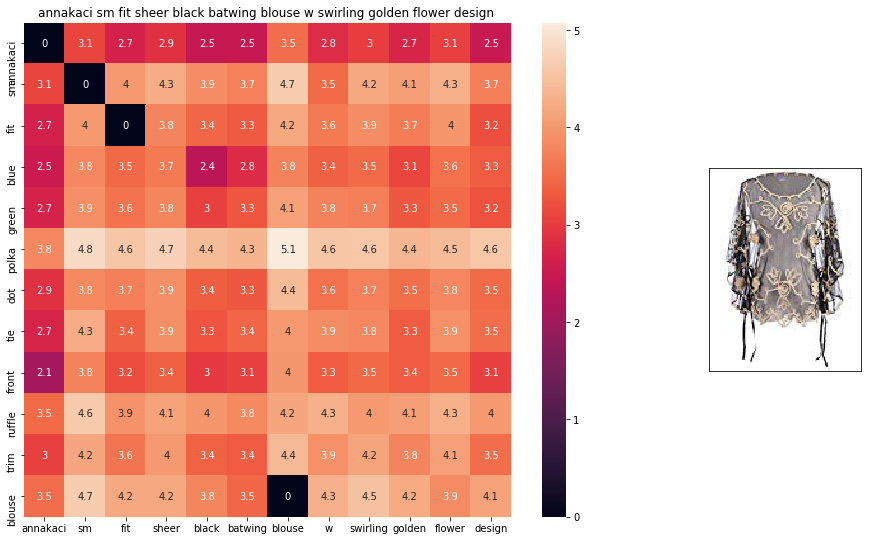

ASIN : B008LE9GA2
BRAND : Anna-Kaci
euclidean distance from given input image : 0.84813684


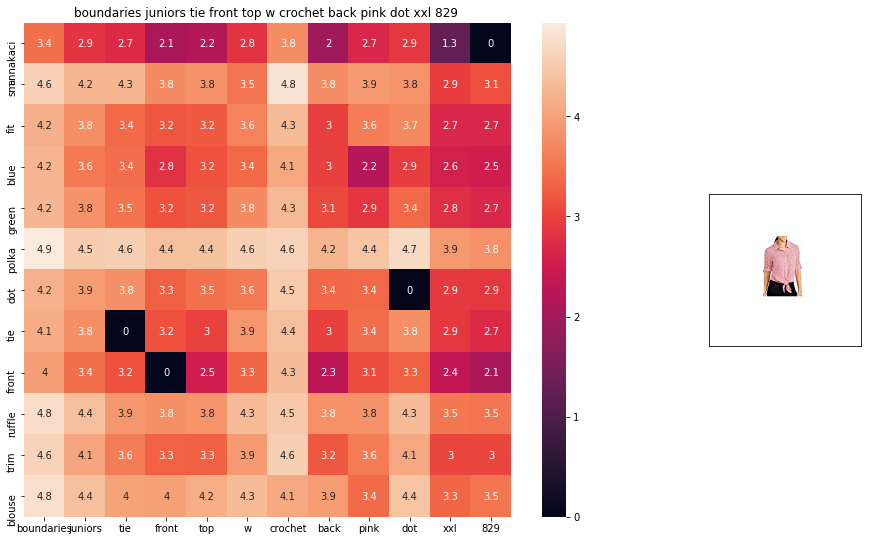

ASIN : B01JCZWOUW
BRAND : No Boundaries
euclidean distance from given input image : 0.8488441


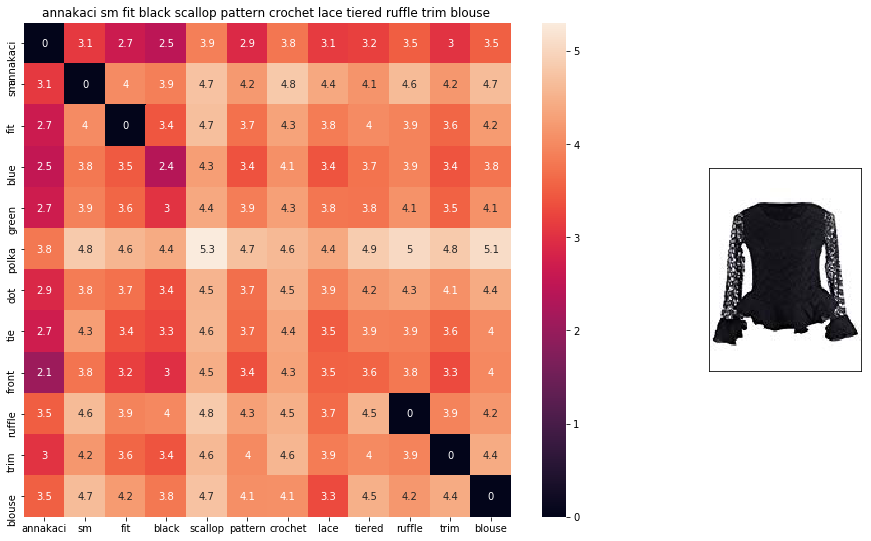

ASIN : B00O194W8W
BRAND : Anna-Kaci
euclidean distance from given input image : 0.8498149


In [14]:
def avg_w2v_model(doc_id, num_results):
    # doc_id: apparel's id in given corpus
    
    # dist(x, y) = sqrt(dot(x, x) - 2 * dot(x, y) + dot(y, y))
    pairwise_dist = pairwise_distances(w2v_title, w2v_title[doc_id].reshape(1,-1))

    # np.argsort will return indices of 9 smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the 9 smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])
    
    for i in range(0, len(indices)):
        heat_map_w2v(data['title'].loc[df_indices[0]],data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], indices[0], indices[i], 'avg')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('BRAND :',data['brand'].loc[df_indices[i]])
        print ('euclidean distance from given input image :', pdists[i])
        print('='*125)

        
avg_w2v_model(931, 20)
# in the give heat map, each cell contains the euclidean distance between words i, j

## load Data

In [19]:
img_data = np.load('16k_data_cnn_features.npy')
asins = np.load('16k_data_cnn_feature_asins.npy')
data = pd.read_pickle('pickels/16k_apperal_data_preprocessed')
df_asins = list(data['asin'])
asins = list(asins)

In [20]:
import pickle
with open('word2vec_model', 'rb') as handle:
    model = pickle.load(handle)

In [21]:
data['brand'].fillna(value="Not given", inplace=True )

# replace spaces with hypen
brands = [x.replace(" ", "-") for x in data['brand'].values]
types = [x.replace(" ", "-") for x in data['product_type_name'].values]
colors = [x.replace(" ", "-") for x in data['color'].values]

brand_vectorizer = CountVectorizer()
brand_features = brand_vectorizer.fit_transform(brands)

type_vectorizer = CountVectorizer()
type_features = type_vectorizer.fit_transform(types)

color_vectorizer = CountVectorizer()
color_features = color_vectorizer.fit_transform(colors)

extra_features = hstack((brand_features, type_features, color_features)).tocsr()

In [22]:
idf_title_vectorizer = CountVectorizer()
idf_title_features = idf_title_vectorizer.fit_transform(data['title'])

In [23]:
vocab = model.keys()
# this function will add the vectors of each word and returns the avg vector of given sentance
def build_avg_vec(sentence, num_features, doc_id, m_name):
    # sentace: its title of the apparel
    # num_features: the lenght of word2vec vector, its values = 300
    # m_name: model information it will take two values
        # if  m_name == 'avg', we will append the model[i], w2v representation of word i
        # if m_name == 'weighted', we will multiply each w2v[word] with the idf(word)

    featureVec = np.zeros((num_features,), dtype="float32")
    # we will intialize a vector of size 300 with all zeros
    # we add each word2vec(wordi) to this fetureVec
    nwords = 0
    
    for word in sentence.split():
        nwords += 1
        if word in vocab:
            if m_name == 'weighted' and word in  idf_title_vectorizer.vocabulary_:
                featureVec = np.add(featureVec, idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[word]] * model[word])
            elif m_name == 'avg':
                featureVec = np.add(featureVec, model[word])
    if(nwords>0):
        featureVec = np.divide(featureVec, nwords)
    # returns the avg vector of given sentance, its of shape (1, 300)
    return featureVec

In [24]:
doc_id = 0
w2v_title_weight = []
# for every title we build a weighted vector representation
for i in data['title']:
    w2v_title_weight.append(build_avg_vec(i, 300, doc_id,'weighted'))
    doc_id += 1
# w2v_title = np.array(# number of doc in courpus * 300), each row corresponds to a doc 
w2v_title_weight = np.array(w2v_title_weight)
#print ("hi")

In [25]:
def display_img(url,ax,fig):
    # we get the url of the apparel and download it
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    # we will display it in notebook 
    plt.imshow(img)

In [26]:
def get_word_vec(sentence, doc_id, m_name):
    # sentence : title of the apparel
    # doc_id: document id in our corpus
    # m_name: model information it will take two values
        # if  m_name == 'avg', we will append the model[i], w2v representation of word i
        # if m_name == 'weighted', we will multiply each w2v[word] with the idf(word)
    vec = []
    for i in sentence.split():
        if i in vocab:
            if m_name == 'weighted' and i in  idf_title_vectorizer.vocabulary_:
                vec.append(idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[i]] * model[i])
            elif m_name == 'avg':
                vec.append(model[i])
        else:
            # if the word in our courpus is not there in the google word2vec corpus, we are just ignoring it
            vec.append(np.zeros(shape=(300,)))
    # we will return a numpy array of shape (#number of words in title * 300 ) 300 = len(w2v_model[word])
    # each row represents the word2vec representation of each word (weighted/avg) in given sentance 
    return  np.array(vec)

def get_distance(vec1, vec2):
    # vec1 = np.array(#number_of_words_title1 * 300), each row is a vector of length 300 corresponds to each word in give title
    # vec2 = np.array(#number_of_words_title2 * 300), each row is a vector of length 300 corresponds to each word in give title
    
    final_dist = []
    # for each vector in vec1 we caluclate the distance(euclidean) to all vectors in vec2
    for i in vec1:
        dist = []
        for j in vec2:
            # np.linalg.norm(i-j) will result the euclidean distance between vectors i, j
            dist.append(np.linalg.norm(i-j))
        final_dist.append(np.array(dist))
    # final_dist = np.array(#number of words in title1 * #number of words in title2)
    # final_dist[i,j] = euclidean distance between vectors i, j
    return np.array(final_dist)

In [27]:
def heat_map_w2v_brand(sentance1, sentance2, url, doc_id1, doc_id2, df_id1, df_id2, model):
    
    # sentance1 : title1, input apparel
    # sentance2 : title2, recommended apparel
    # url: apparel image url
    # doc_id1: document id of input apparel
    # doc_id2: document id of recommended apparel
    # df_id1: index of document1 in the data frame
    # df_id2: index of document2 in the data frame
    # model: it can have two values, 1. avg 2. weighted
    
    #s1_vec = np.array(#number_of_words_title1 * 300), each row is a vector(weighted/avg) of length 300 corresponds to each word in give title
    s1_vec = get_word_vec(sentance1, doc_id1, model)
    #s2_vec = np.array(#number_of_words_title2 * 300), each row is a vector(weighted/avg) of length 300 corresponds to each word in give title
    s2_vec = get_word_vec(sentance2, doc_id2, model)
    
    # s1_s2_dist = np.array(#number of words in title1 * #number of words in title2)
    # s1_s2_dist[i,j] = euclidean distance between words i, j
    s1_s2_dist = get_distance(s1_vec, s2_vec)
   
    data_matrix = [['Asin','Brand', 'Color', 'Product type'],
               [data['asin'].loc[df_id1],brands[doc_id1], colors[doc_id1], types[doc_id1]], # input apparel's features
               [data['asin'].loc[df_id2],brands[doc_id2], colors[doc_id2], types[doc_id2]]] # recommonded apparel's features
    
    colorscale = [[0, '#1d004d'],[.5, '#f2e5ff'],[1, '#f2e5d1']] # to color the headings of each column 
    
    # we create a table with the data_matrix
    table = ff.create_table(data_matrix, index=True, colorscale=colorscale)
    # plot it with plotly
    plotly.offline.iplot(table, filename='simple_table')
    
    # devide whole figure space into 25 * 1:10 grids
    gs = gridspec.GridSpec(25, 15)
    fig = plt.figure(figsize=(25,5))
    # in first 25*10 grids we plot heatmap
    ax1 = plt.subplot(gs[:, :-5])
    # ploting the heap map based on the pairwise distances
    ax1 = sns.heatmap(np.round(s1_s2_dist,6), annot=True)
    # set the x axis labels as recommended apparels title
    ax1.set_xticklabels(sentance2.split())
    # set the y axis labels as input apparels title
    ax1.set_yticklabels(sentance1.split())
    # set title as recommended apparels title
    ax1.set_title(sentance2)

    # in last 25 * 10:15 grids we display image
    ax2 = plt.subplot(gs[:, 10:16])
    # we dont display grid lins and axis labels to images
    ax2.grid(False)
    ax2.set_xticks([])
    ax2.set_yticks([])
    
    # pass the url it display it
    display_img(url, ax2, fig)
    
    plt.show()    

## Text,brand & Color based similar product recommendation

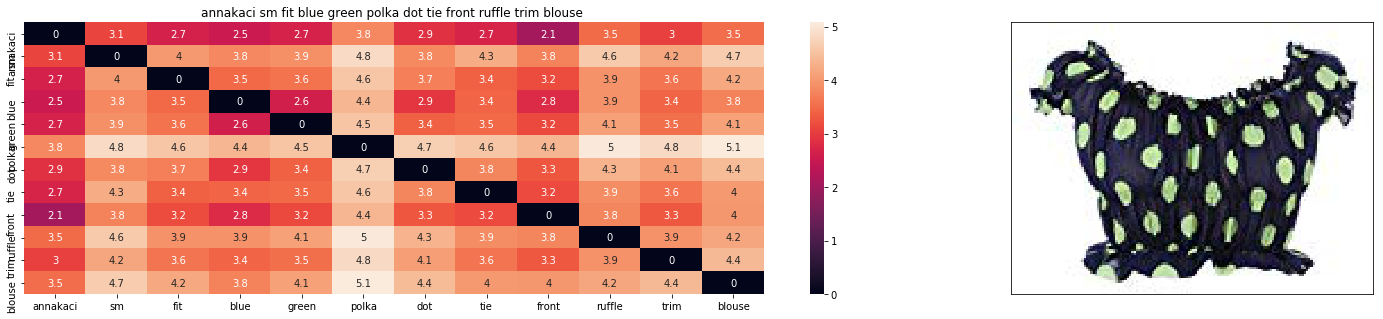

ASIN : B00KLHUIBS
Brand : Anna-Kaci
euclidean distance from input : 0.0


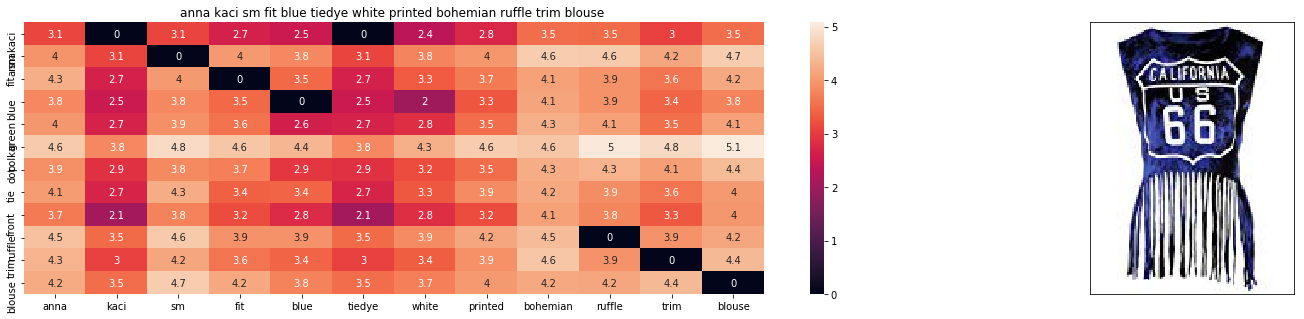

ASIN : B00YQ8S4K0
Brand : Anna-Kaci
euclidean distance from input : 0.8345345020294189


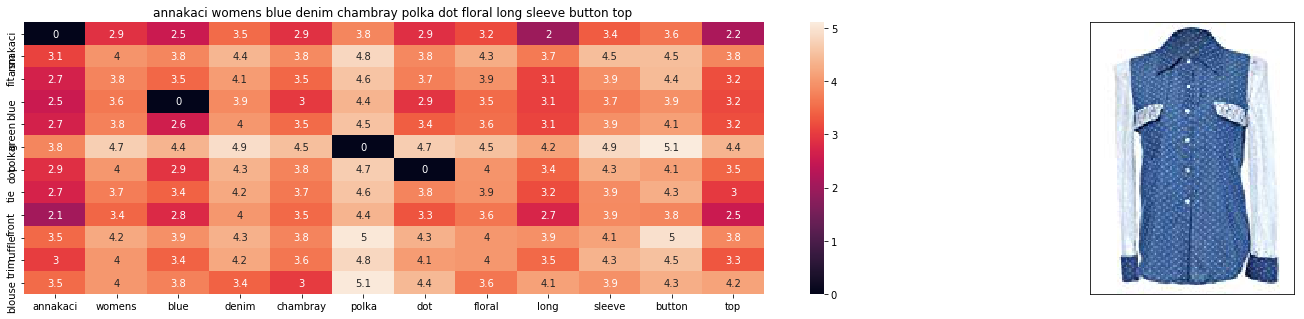

ASIN : B008SMIFN6
Brand : Anna-Kaci
euclidean distance from input : 0.9380109310150146


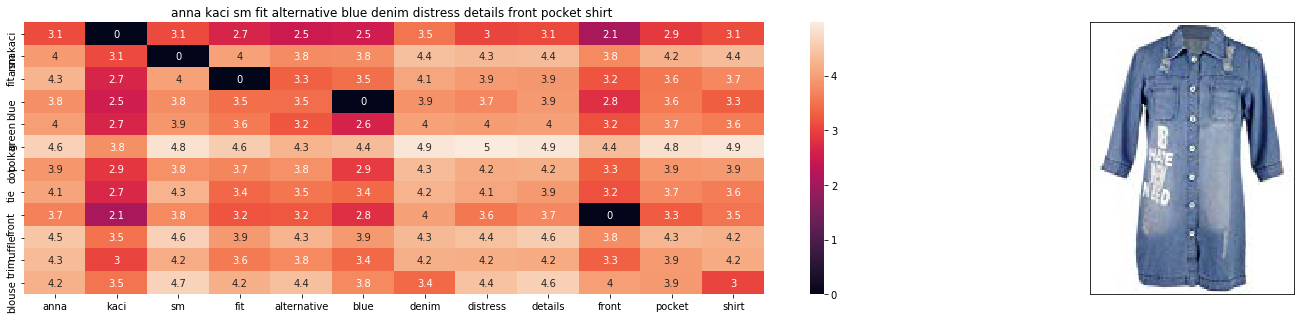

ASIN : B010EH2WCW
Brand : Anna-Kaci
euclidean distance from input : 0.9422549724578857


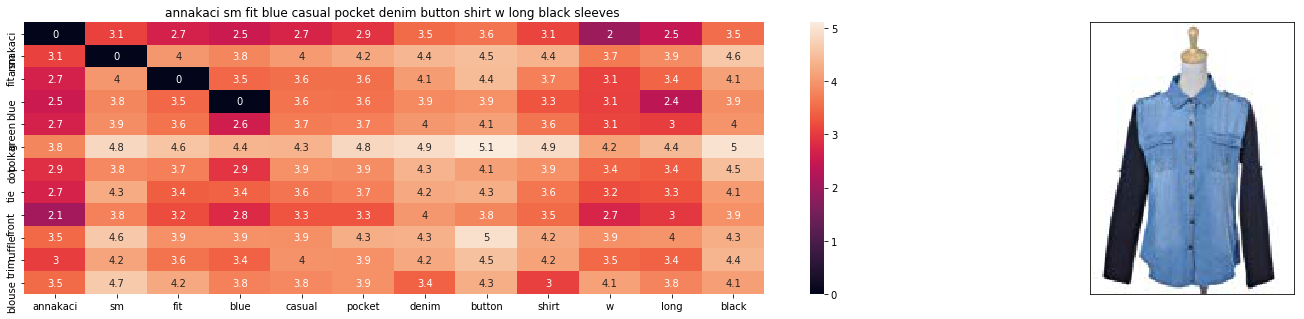

ASIN : B0097LQOOY
Brand : Anna-Kaci
euclidean distance from input : 0.9490258693695068


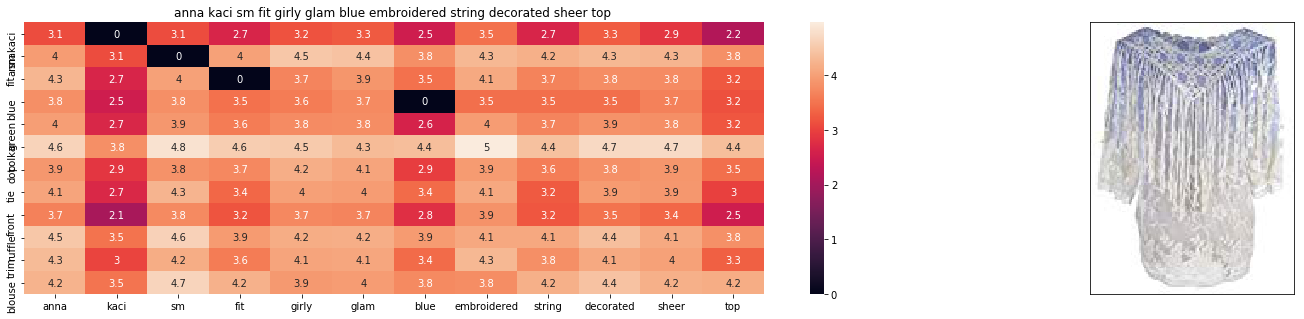

ASIN : B0128Z1BNO
Brand : Anna-Kaci
euclidean distance from input : 0.9507386207580566


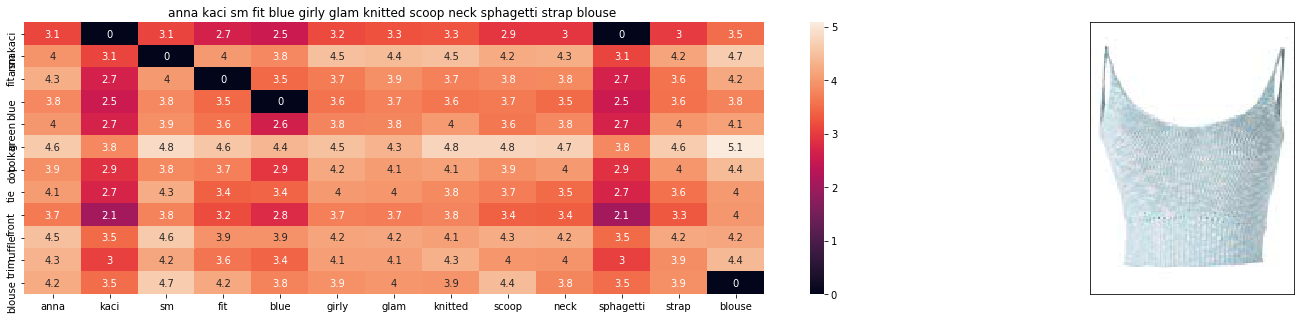

ASIN : B010EH1PCK
Brand : Anna-Kaci
euclidean distance from input : 0.9638854503631592


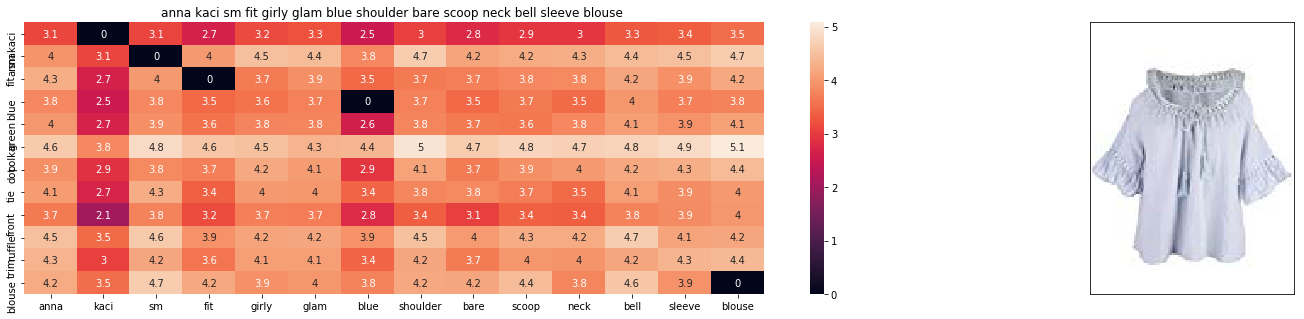

ASIN : B0128Z19IQ
Brand : Anna-Kaci
euclidean distance from input : 0.9749879360198974


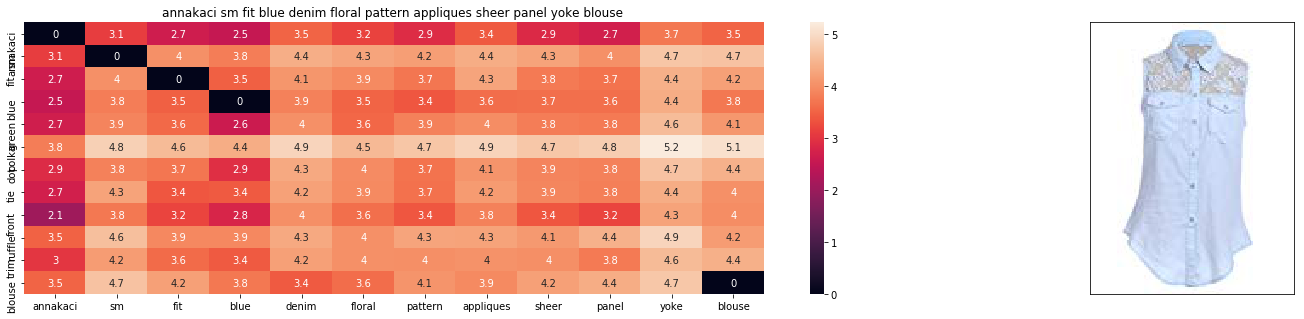

ASIN : B00E7Z8G8M
Brand : Anna-Kaci
euclidean distance from input : 1.0041077613830567


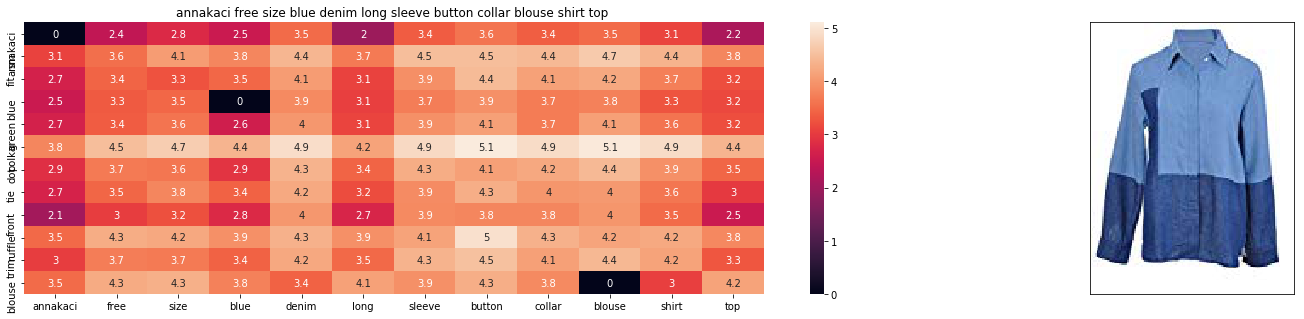

ASIN : B00726I25U
Brand : Anna-Kaci
euclidean distance from input : 1.0215688228607178


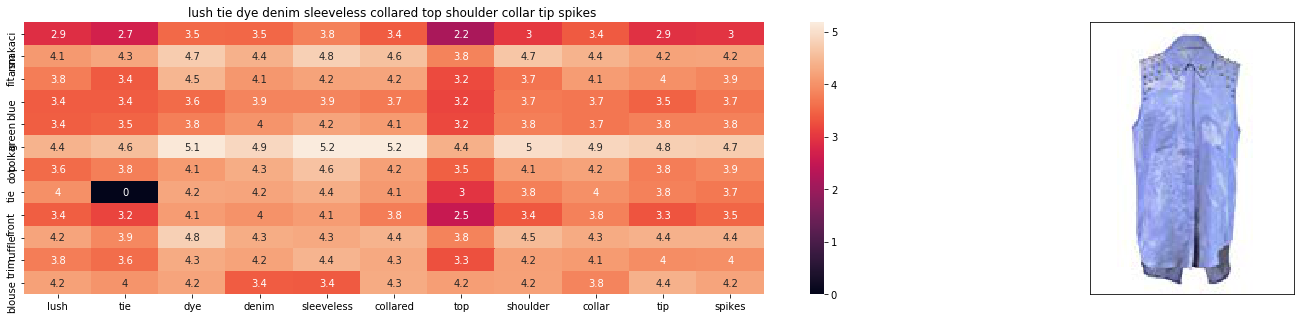

ASIN : B00FH9CBE2
Brand : Anna-Kaci
euclidean distance from input : 1.0770315647125244


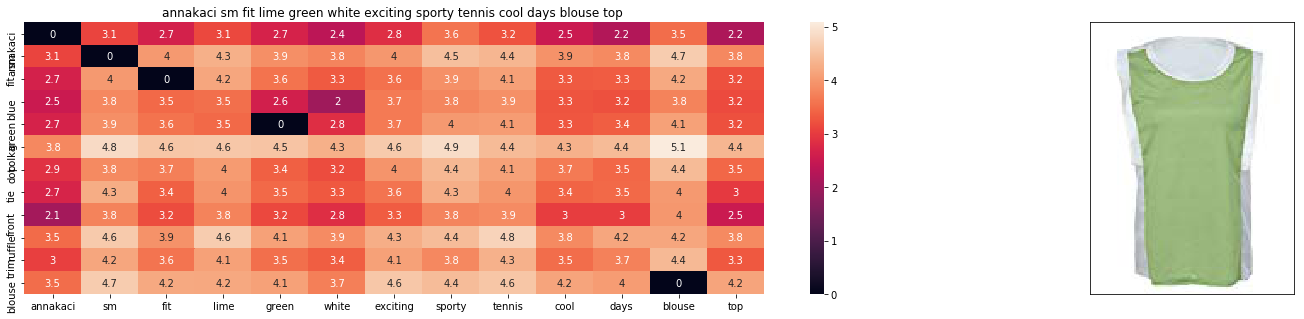

ASIN : B007Y9SZSY
Brand : Anna-Kaci
euclidean distance from input : 1.1287291528601315


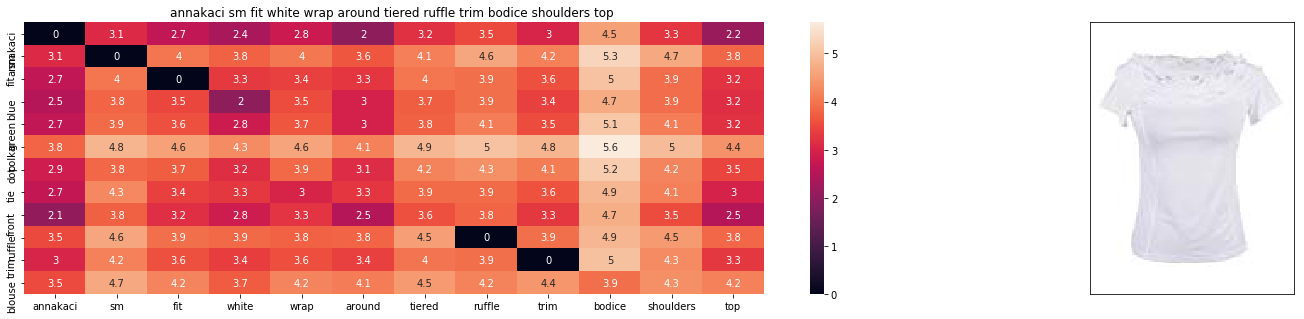

ASIN : B00LMKGFS8
Brand : Anna-Kaci
euclidean distance from input : 1.2707369840609277


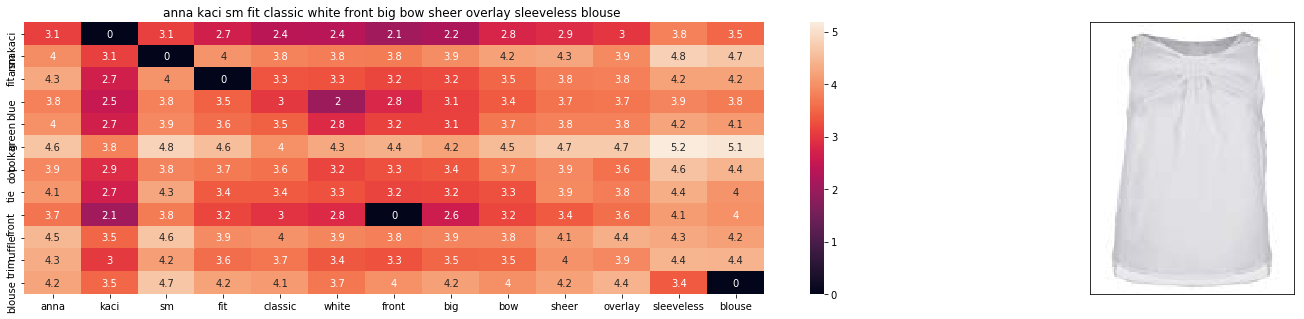

ASIN : B010EH3S02
Brand : Anna-Kaci
euclidean distance from input : 1.2754337823855129


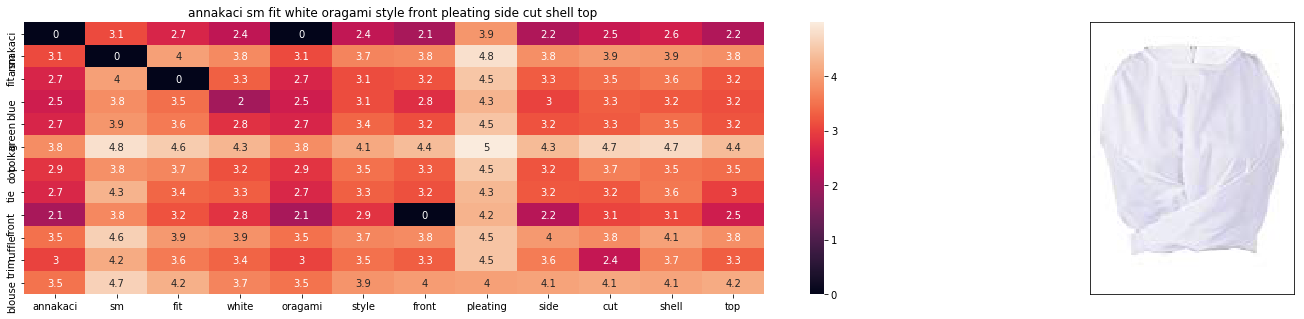

ASIN : B00LU4Z2YY
Brand : Anna-Kaci
euclidean distance from input : 1.2755259073244776


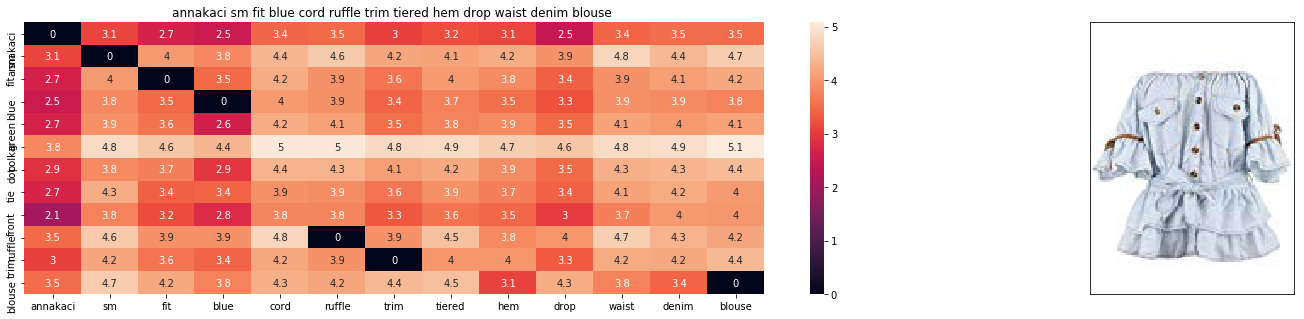

ASIN : B0759G15ZX
Brand : Anna-Kaci
euclidean distance from input : 1.279416135595962


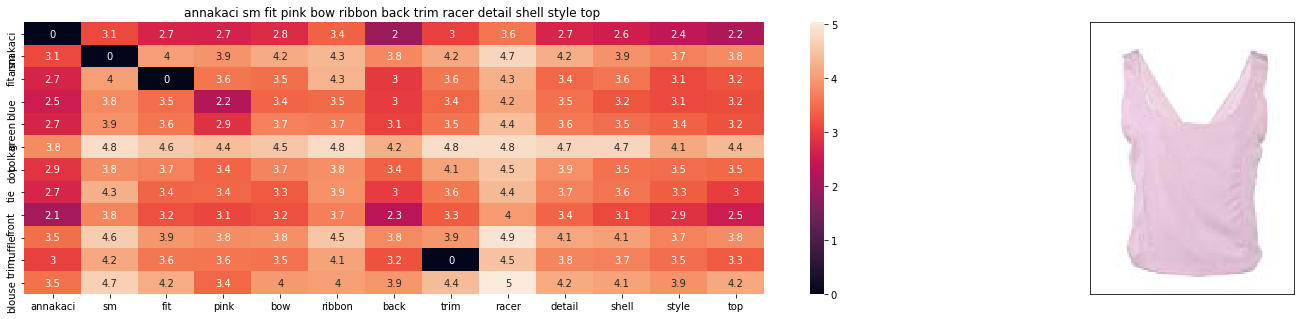

ASIN : B00KOBQEBO
Brand : Anna-Kaci
euclidean distance from input : 1.2794473684298242


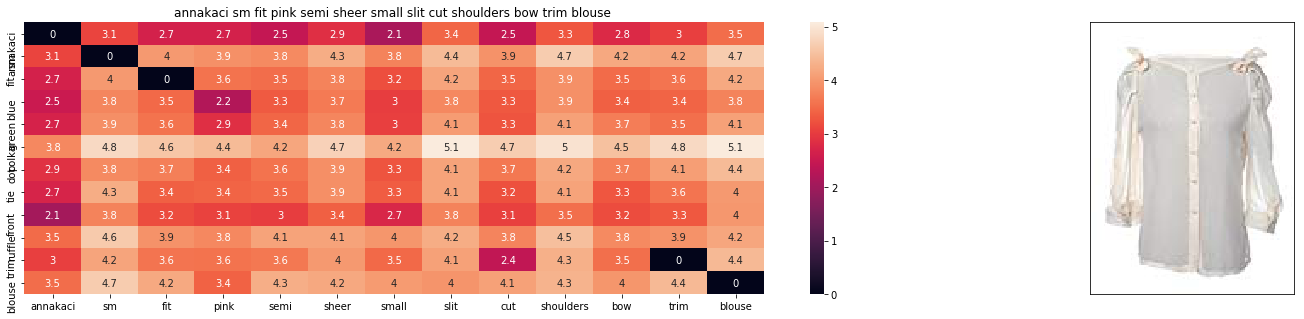

ASIN : B00HM9OD8W
Brand : Anna-Kaci
euclidean distance from input : 1.2797107255923


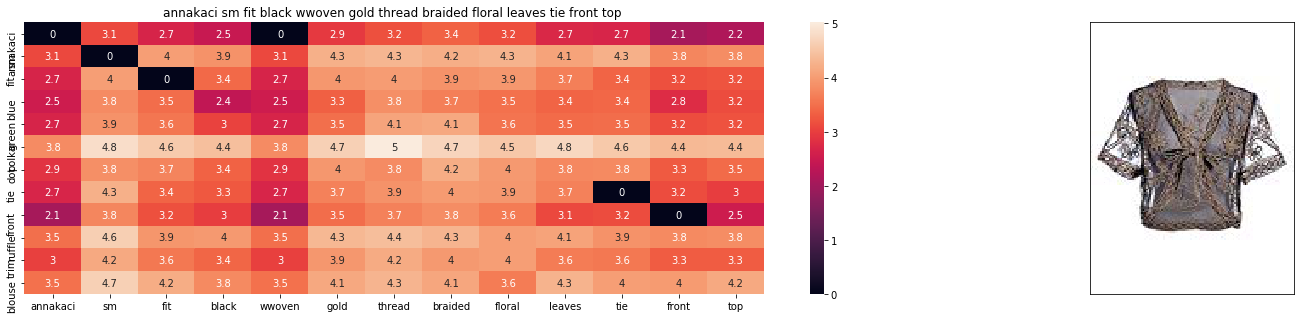

ASIN : B00E7Z8DWQ
Brand : Anna-Kaci
euclidean distance from input : 1.2799756086336818


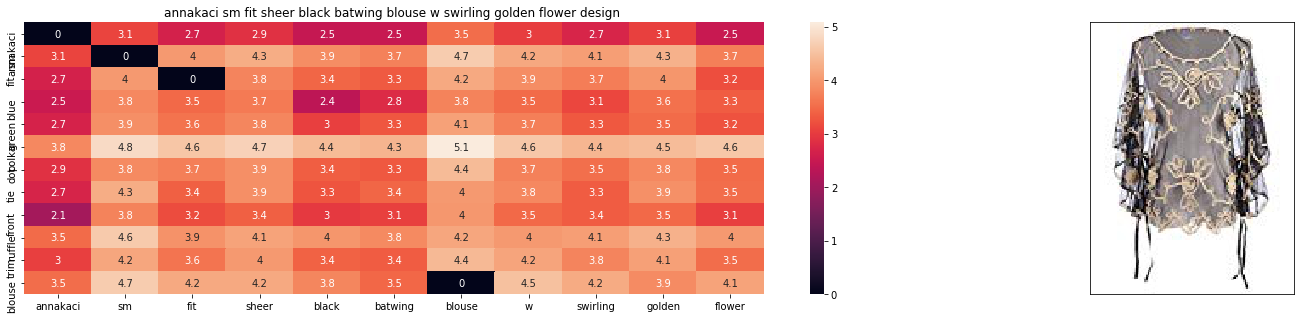

ASIN : B008LE9GA2
Brand : Anna-Kaci
euclidean distance from input : 1.280672887610122


In [29]:
def idf_w2v_brand(doc_id, w1, w2, num_results):
    # doc_id: apparel's id in given corpus
    # w1: weight for  w2v features
    # w2: weight for brand and color features

    # pairwise_dist will store the distance from given input apparel to all remaining apparels
    # the metric we used here is cosine, the coside distance is mesured as K(X, Y) = <X, Y> / (||X||*||Y||)
    # http://scikit-learn.org/stable/modules/metrics.html#cosine-similarity
    idf_w2v_dist  = pairwise_distances(w2v_title_weight, w2v_title_weight[doc_id].reshape(1,-1))
    ex_feat_dist = pairwise_distances(extra_features, extra_features[doc_id])
    pairwise_dist   = (w1 * idf_w2v_dist +  w2 * ex_feat_dist)/float(w1 + w2)

    # np.argsort will return indices of 9 smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the 9 smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])
    

    for i in range(0, len(indices)):
        heat_map_w2v_brand(data['title'].loc[df_indices[0]],data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], indices[0], indices[i],df_indices[0], df_indices[i], 'weighted')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('Brand :',data['brand'].loc[df_indices[i]])
        print('euclidean distance from input :', pdists[i])
        print('='*125)

idf_w2v_brand(931, 5, 5, 20)

## Text , Brand , Color and Image based similar product recommendation

idf_w2v_dist: (16042, 1)
ex_feat_dist: (16042, 1)
image dist shape: (16042, 1)


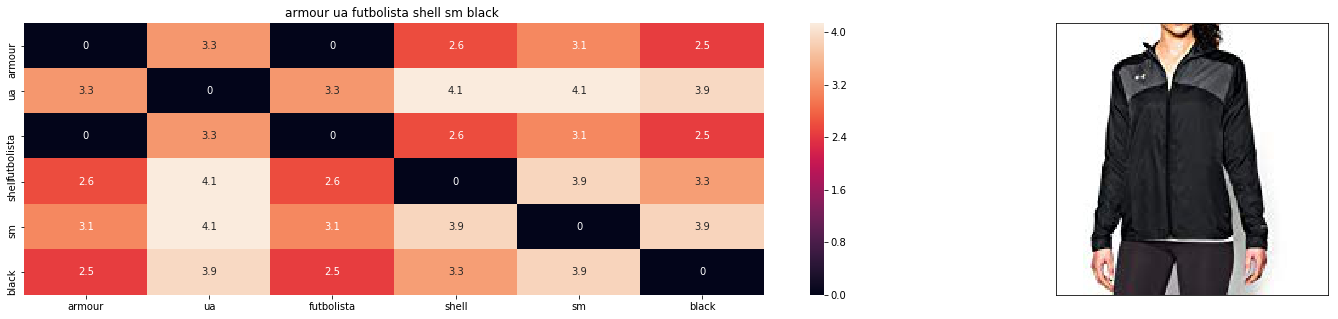

ASIN : B0185VYVR8
Brand : UNDER ARMOUR > UA Tops
euclidean distance from input : 1.1538640599189462


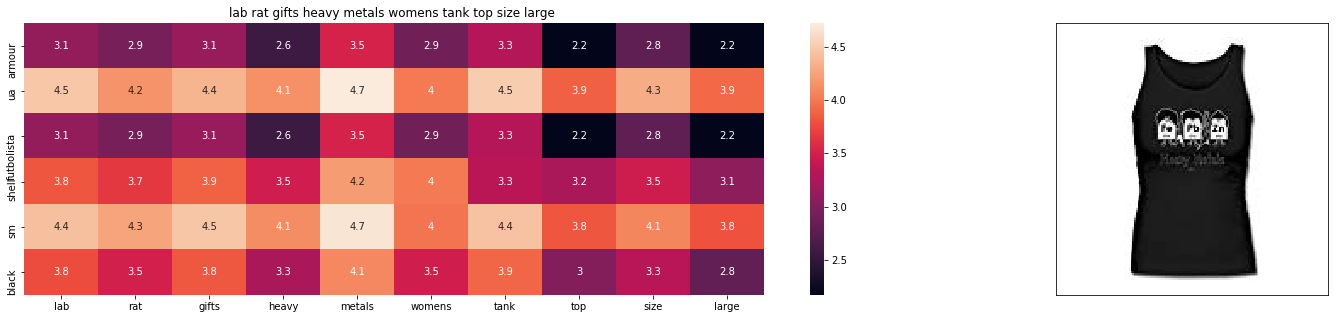

ASIN : B01N3PVWQN
Brand : Lab Rat Gifts
euclidean distance from input : 22.625986619593416


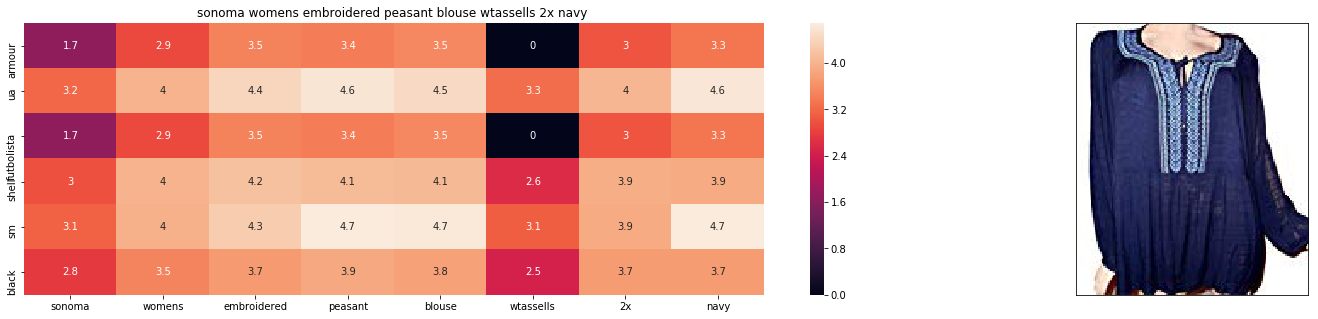

ASIN : B0755R5GF1
Brand : Sonoma
euclidean distance from input : 22.89846484369118


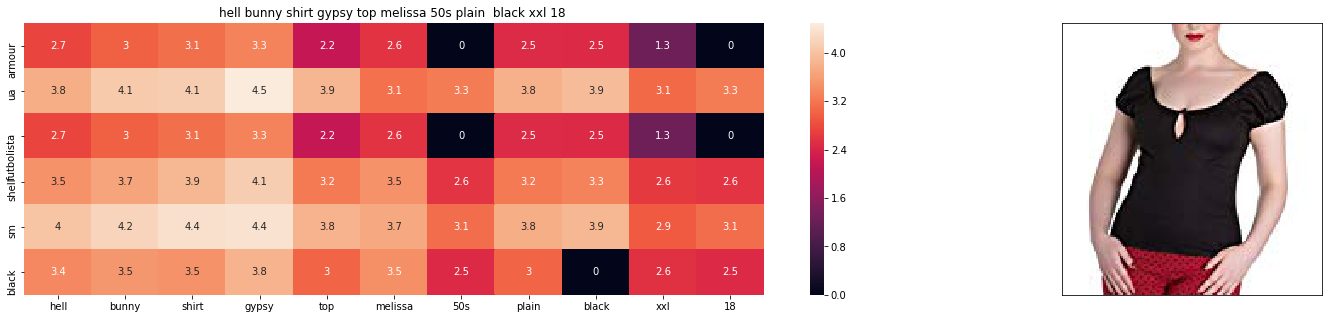

ASIN : B01ANZH0S6
Brand : Ripleys Clothing
euclidean distance from input : 22.98039280864344


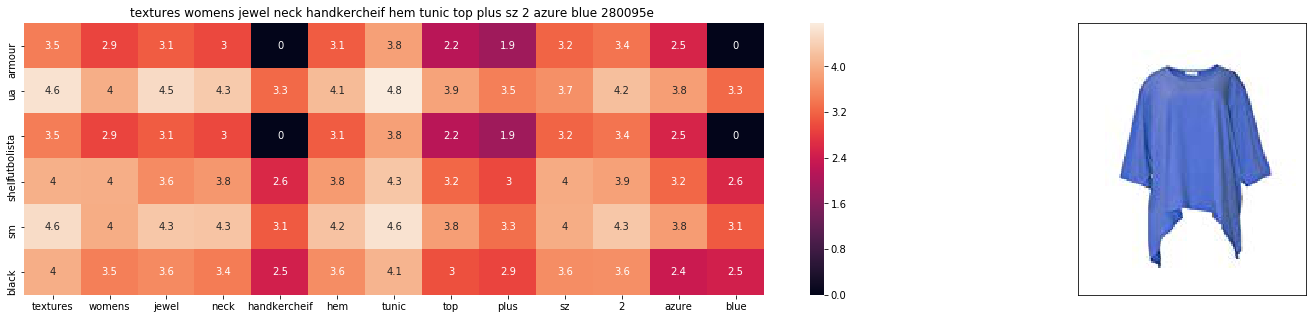

ASIN : B073T2SP79
Brand : Textures
euclidean distance from input : 23.06936380137717


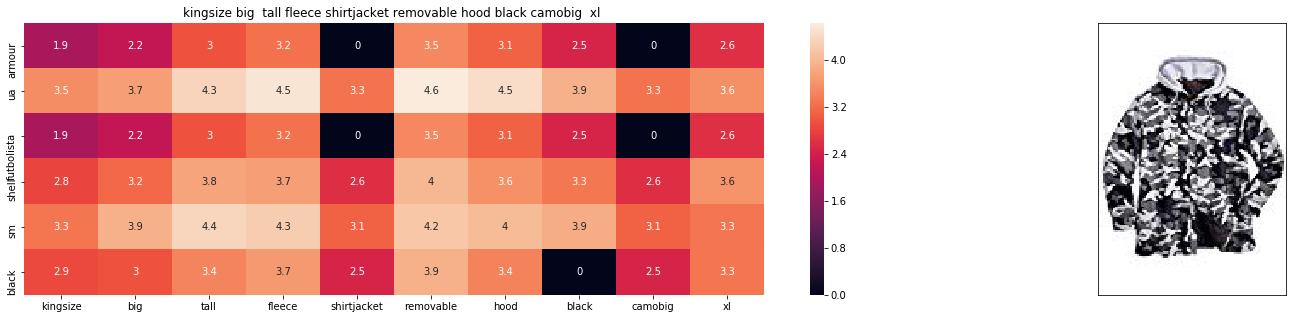

ASIN : B0758NFBN7
Brand : Bargain Catalog Outlet
euclidean distance from input : 23.110907034440473


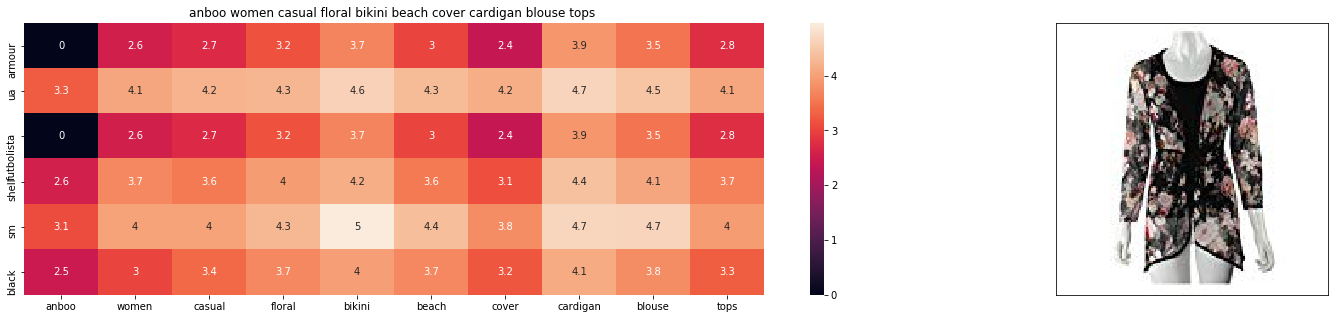

ASIN : B01H17WYB2
Brand : Anboo
euclidean distance from input : 23.14208393243245


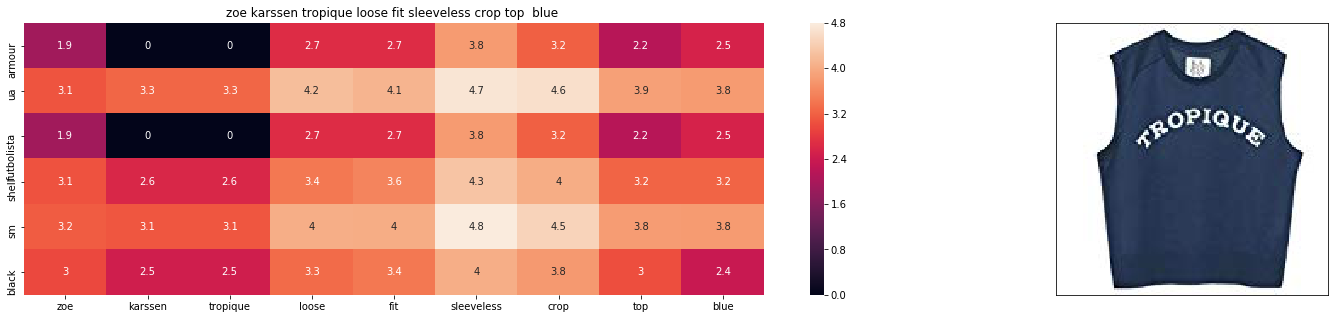

ASIN : B01ND46TFT
Brand : Zoe Karssen
euclidean distance from input : 23.18698987431414


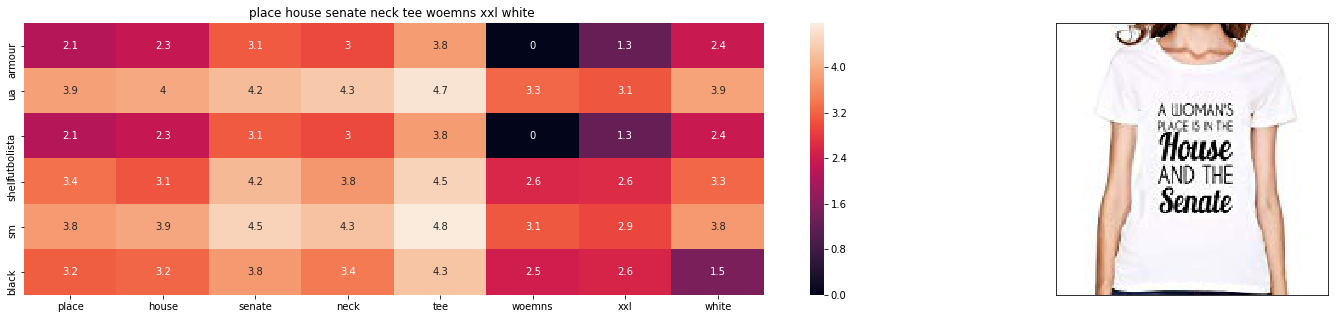

ASIN : B01JW4QSVY
Brand : Cheryle Sigafoos
euclidean distance from input : 23.18865535475991


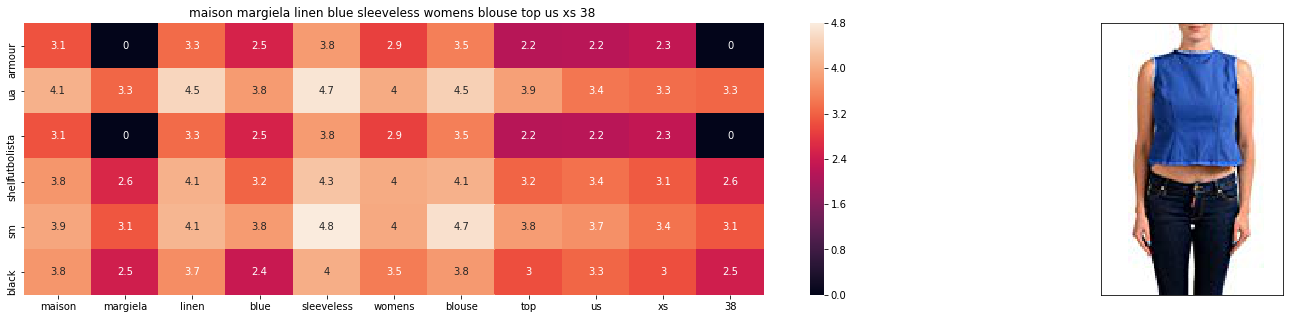

ASIN : B074G3XPWW
Brand : Maison Margiela
euclidean distance from input : 23.22660372811552


In [30]:
def idf_w2v_brand(doc_id, w1, w2, w3, num_results):
    # doc_id: apparel's id in given corpus
    # w1: weight for  w2v features
    # w2: weight for brand and color features
    # w3: weight for image

    # pairwise_dist will store the distance from given input apparel to all remaining apparels
    # the metric we used here is cosine, the coside distance is mesured as K(X, Y) = <X, Y> / (||X||*||Y||)
    # http://scikit-learn.org/stable/modules/metrics.html#cosine-similarity
    idf_w2v_dist  = pairwise_distances(w2v_title_weight, w2v_title_weight[doc_id].reshape(1,-1))
    print("idf_w2v_dist:",idf_w2v_dist.shape)
    ex_feat_dist = pairwise_distances(extra_features, extra_features[doc_id])
    print("ex_feat_dist:",ex_feat_dist.shape)
    doc_id = asins.index(df_asins[doc_id])
    img_dist = pairwise_distances(img_data, img_data[doc_id].reshape(1,-1))
    print("image dist shape:",img_dist.shape)
    pairwise_dist   = (w1 * idf_w2v_dist +  w2 * ex_feat_dist + w3 * img_dist)/float(w1 + w2 + w3)

    # np.argsort will return indices of 9 smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the 9 smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])
    

    for i in range(0, len(indices)):
        heat_map_w2v_brand(data['title'].loc[df_indices[0]],data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], indices[0], indices[i],df_indices[0], df_indices[i], 'weighted')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('Brand :',data['brand'].loc[df_indices[i]])
        print('euclidean distance from input :', pdists[i])
        print('='*125)

idf_w2v_brand(931, 7, 5, 10, 10)

## Conclusion:

> Used Text , color , brand and Images as features to recommend similar product to user

> Tried different weights to see the how features are recommended to user based on weights 

<h2>Steps by steps</h2> 

 1. Loading and reading data from json file
 2. Some insight of data how the features are , number of datapoints , number of features
 3. Pre-processing on text
 4. Trying different featurization
 5. Recommending similar based product using bag of words , Tf-idf, idf, w2v,avg-w2v
 6. Using visual features to recommend products to user.
 7. Tried combinnation of text , color, brand and image to recommend similar based produc to user.